In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sns.set_theme(style="darkgrid")
pd.options.plotting.backend = "matplotlib"

In [4]:
inventory = pd.read_csv('inventory.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')

In [5]:
products['Product_Cost'] = products['Product_Cost'].str.replace('$', '', regex=False).astype(float)
products['Product_Price'] = products['Product_Price'].str.replace('$', '', regex=False).astype(float)
products['Product_Name'] = products['Product_Name'].astype('category')
products['Product_Category'] = products['Product_Category'].astype('category')
products['Product_ID'] = products['Product_ID'].astype('Int64')

In [6]:
merged = pd.merge(inventory, products, on='Product_ID', how='outer')
merged = pd.merge(merged, sales, on=['Store_ID', 'Product_ID'], how='outer')
df = pd.merge(merged, stores, on='Store_ID', how='outer')

In [7]:
df.head()

Store_ID  Product_ID  Stock_On_Hand   Product_Name Product_Category  \
0         1           1           27.0  Action Figure             Toys   
1         1           1           27.0  Action Figure             Toys   
2         1           1           27.0  Action Figure             Toys   
3         1           1           27.0  Action Figure             Toys   
4         1           1           27.0  Action Figure             Toys   

   Product_Cost  Product_Price  Sale_ID        Date  Units  \
0          9.99          15.99   1210.0  2022-01-02    1.0   
1          9.99          15.99   1249.0  2022-01-02    1.0   
2          9.99          15.99   1272.0  2022-01-02    1.0   
3          9.99          15.99   1275.0  2022-01-02    1.0   
4          9.99          15.99   1591.0  2022-01-02    1.0   

                 Store_Name   Store_City Store_Location Store_Open_Date  
0  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
1  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
2  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
3  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
4  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829265 entries, 0 to 829264
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Store_ID          829265 non-null  int64   
 1   Product_ID        829265 non-null  int64   
 2   Stock_On_Hand     823033 non-null  float64 
 3   Product_Name      823033 non-null  category
 4   Product_Category  823033 non-null  category
 5   Product_Cost      823033 non-null  float64 
 6   Product_Price     823033 non-null  float64 
 7   Sale_ID           829262 non-null  float64 
 8   Date              829262 non-null  object  
 9   Units             829262 non-null  float64 
 10  Store_Name        829265 non-null  object  
 11  Store_City        829265 non-null  object  
 12  Store_Location    829265 non-null  object  
 13  Store_Open_Date   829265 non-null  object  
dtypes: category(2), float64(5), int64(2), object(5)
memory usage: 77.5+ MB


In [9]:
df['Store_ID'] = df['Store_ID'].astype('Int64')
df['Store_Name'] = df['Store_Name'].astype('category')
df['Store_City'] = df['Store_City'].astype('category')
df['Store_Location'] = df['Store_Location'].astype('category')
df['Store_Open_Date'] = pd.to_datetime(df['Store_Open_Date'])

df['Date'] = pd.to_datetime(df['Date'])

df['Sale_ID'] = df['Sale_ID'].astype('Int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829265 entries, 0 to 829264
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Store_ID          829265 non-null  Int64         
 1   Product_ID        829265 non-null  int64         
 2   Stock_On_Hand     823033 non-null  float64       
 3   Product_Name      823033 non-null  category      
 4   Product_Category  823033 non-null  category      
 5   Product_Cost      823033 non-null  float64       
 6   Product_Price     823033 non-null  float64       
 7   Sale_ID           829262 non-null  Int64         
 8   Date              829262 non-null  datetime64[ns]
 9   Units             829262 non-null  float64       
 10  Store_Name        829265 non-null  category      
 11  Store_City        829265 non-null  category      
 12  Store_Location    829265 non-null  category      
 13  Store_Open_Date   829265 non-null  datetime64[ns]
dtypes: I

In [11]:
df.isnull().sum()

Store_ID               0
Product_ID             0
Stock_On_Hand       6232
Product_Name        6232
Product_Category    6232
Product_Cost        6232
Product_Price       6232
Sale_ID                3
Date                   3
Units                  3
Store_Name             0
Store_City             0
Store_Location         0
Store_Open_Date        0
dtype: int64

In [12]:
df[df['Sale_ID'].isnull()]

Store_ID  Product_ID  Stock_On_Hand     Product_Name Product_Category  \
236750        14          26            3.0  PlayDoh Playset     Art & Crafts   
437901        27          26            6.0  PlayDoh Playset     Art & Crafts   
471984        29          33            6.0       Teddy Bear             Toys   

        Product_Cost  Product_Price  Sale_ID Date  Units  \
236750         20.99          24.99     <NA>  NaT    NaN   
437901         20.99          24.99     <NA>  NaT    NaN   
471984         10.99          12.99     <NA>  NaT    NaN   

                     Store_Name  Store_City Store_Location Store_Open_Date  
236750  Maven Toys Guanajuato 1  Guanajuato       Downtown      2007-01-31  
437901      Maven Toys Oaxaca 1      Oaxaca       Downtown      2010-10-02  
471984      Maven Toys Xalapa 1      Xalapa     Commercial      2011-06-21

In [13]:
df = df.dropna(subset=['Sale_ID'])

In [14]:
df[df['Stock_On_Hand'].isnull()].head()

Store_ID  Product_ID  Stock_On_Hand Product_Name Product_Category  \
31497         2          16            NaN          NaN              NaN   
31498         2          16            NaN          NaN              NaN   
31499         2          16            NaN          NaN              NaN   
31500         2          16            NaN          NaN              NaN   
31501         2          16            NaN          NaN              NaN   

       Product_Cost  Product_Price  Sale_ID       Date  Units  \
31497           NaN            NaN   143683 2022-05-16    1.0   
31498           NaN            NaN   143687 2022-05-16    1.0   
31499           NaN            NaN   143908 2022-05-16    1.0   
31500           NaN            NaN   161143 2022-05-31    1.0   
31501           NaN            NaN   161174 2022-05-31    1.0   

                   Store_Name Store_City Store_Location Store_Open_Date  
31497  Maven Toys Monterrey 1  Monterrey    Residential      1995-04-27  
31498  Maven Toys Monterrey 1  Monterrey    Residential      1995-04-27  
31499  Maven Toys Monterrey 1  Monterrey    Residential      1995-04-27  
31500  Maven Toys Monterrey 1  Monterrey    Residential      1995-04-27  
31501  Maven Toys Monterrey 1  Monterrey    Residential      1995-04-27

In [15]:
df.loc[df['Stock_On_Hand'].isnull(), 'Product_ID'].unique()

array([16, 20,  5, 35,  4, 22, 29, 23], dtype=int64)

In [16]:

df['Stock_On_Hand'] = df['Stock_On_Hand'].fillna(0)

In [17]:
df['Product_Name'] = df['Product_Name'].fillna(df['Product_ID'].map(products.set_index('Product_ID')['Product_Name']))
df['Product_Category'] = df['Product_Category'].fillna(df['Product_ID'].map(products.set_index('Product_ID')['Product_Category']))
df['Product_Cost'] = df['Product_Cost'].fillna(df['Product_ID'].map(products.set_index('Product_ID')['Product_Cost'])).astype(float)
df['Product_Price'] = df['Product_Price'].fillna(df['Product_ID'].map(products.set_index('Product_ID')['Product_Price'])).astype(float)

In [18]:
df.isnull().sum()

Store_ID            0
Product_ID          0
Stock_On_Hand       0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Sale_ID             0
Date                0
Units               0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
dtype: int64

In [19]:
df.head()

Store_ID  Product_ID  Stock_On_Hand   Product_Name Product_Category  \
0         1           1           27.0  Action Figure             Toys   
1         1           1           27.0  Action Figure             Toys   
2         1           1           27.0  Action Figure             Toys   
3         1           1           27.0  Action Figure             Toys   
4         1           1           27.0  Action Figure             Toys   

   Product_Cost  Product_Price  Sale_ID       Date  Units  \
0          9.99          15.99     1210 2022-01-02    1.0   
1          9.99          15.99     1249 2022-01-02    1.0   
2          9.99          15.99     1272 2022-01-02    1.0   
3          9.99          15.99     1275 2022-01-02    1.0   
4          9.99          15.99     1591 2022-01-02    1.0   

                 Store_Name   Store_City Store_Location Store_Open_Date  
0  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
1  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
2  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
3  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18  
4  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18

# Feature Engineering

In [20]:
df['Sale_Year'] = df['Date'].dt.year
df['Sale_Month'] = df['Date'].dt.month

In [21]:
df['Sale_Is_Weekend'] = df['Date'].dt.weekday >= 5

In [22]:
df['Sale_Quarter'] = df['Date'].dt.to_period('Q')

In [23]:
df['Revenue'] = df['Units'] * df['Product_Price']
df['Profit'] = df['Product_Price'] - df['Product_Cost']
df['Profit_Margin'] = df['Profit'] / df['Product_Price']

products['Profit'] = products['Product_Price'] - products['Product_Cost']
products['Profit_Margin'] = products['Profit'] / products['Product_Price']

In [24]:
df['Stock_Turnover'] = np.where(df['Stock_On_Hand'] > 0, df['Units'] / df['Stock_On_Hand'], 0)  # or np.nan

STOCK_THRESHOLD = 10
df['Stock_Availabile'] = df['Stock_On_Hand'] > STOCK_THRESHOLD

In [25]:
import datetime

now = datetime.datetime.now()

In [26]:
df['Store_Age'] = now - df['Store_Open_Date']

In [27]:
df['Log_Price_Sensitivity'] = np.log(df['Product_Cost'] / df['Product_Price'] + 1)  # Adding 1 to avoid log(0)

In [28]:
df['Inventory_Value'] = df['Stock_On_Hand'] * df['Product_Price']

In [29]:
df.describe()

Store_ID     Product_ID  Stock_On_Hand   Product_Cost  Product_Price  \
count   829262.0  829262.000000  829262.000000  829262.000000  829262.000000   
mean   25.277034      15.014149      25.129153       9.976460      13.772327   
min          1.0       1.000000       0.000000       1.990000       2.990000   
25%         13.0       6.000000       9.000000       3.990000       6.990000   
50%         26.0      14.000000      18.000000       7.990000      12.990000   
75%         38.0      24.000000      35.000000      11.990000      15.990000   
max         50.0      35.000000     139.000000      34.990000      39.990000   
std    14.352573       9.869417      22.972908       7.817749       8.664794   

             Sale_ID                           Date          Units  \
count       829262.0                         829262  829262.000000   
mean        414631.5  2022-12-10 22:14:40.102066176       1.315103   
min              1.0            2022-01-01 00:00:00       1.000000   
25%        207316.25            2022-07-09 00:00:00       1.000000   
50%         414631.5            2022-12-28 00:00:00       1.000000   
75%        621946.75            2023-05-13 00:00:00       1.000000   
max         829262.0            2023-09-30 00:00:00      30.000000   
std    239387.463802                            NaN       0.830701   

                     Store_Open_Date      Sale_Year     Sale_Month  \
count                         829262  829262.000000  829262.000000   
mean   2009-08-22 16:51:08.019516416    2022.492507       5.939756   
min              1992-09-18 00:00:00    2022.000000       1.000000   
25%              2006-08-30 00:00:00    2022.000000       3.000000   
50%              2010-09-15 00:00:00    2022.000000       6.000000   
75%              2014-03-18 00:00:00    2023.000000       8.000000   
max              2016-05-18 00:00:00    2023.000000      12.000000   
std                              NaN       0.499944       3.181711   

             Revenue         Profit  Profit_Margin  Stock_Turnover  \
count  829262.000000  829262.000000  829262.000000   829262.000000   
mean       17.418587       3.795867       0.312271        0.112175   
min         2.990000       1.000000       0.090992        0.000000   
25%         8.990000       2.000000       0.160064        0.029412   
50%        14.990000       3.000000       0.300300        0.058824   
75%        19.990000       5.000000       0.429185        0.125000   
max       879.780000      16.000000       0.700701        4.000000   
std        15.522069       2.446922       0.154415        0.169126   

                          Store_Age  Log_Price_Sensitivity  Inventory_Value  
count                        829262          829262.000000    829262.000000  
mean   5515 days 23:27:12.494345088               0.519100       310.162131  
min       3055 days 16:18:20.513861               0.261825         0.000000  
25%    3847 days 16:18:20.513860992               0.451595        89.940000  
50%    5127 days 16:18:20.513860992               0.530452       207.840000  
75%    6604 days 16:18:20.513860992               0.609731       415.740000  
max      11698 days 16:18:20.513861               0.646584      4678.830000  
std    1956 days 03:04:48.370692640               0.093152       353.012408

In [30]:
df.head()

Store_ID  Product_ID  Stock_On_Hand   Product_Name Product_Category  \
0         1           1           27.0  Action Figure             Toys   
1         1           1           27.0  Action Figure             Toys   
2         1           1           27.0  Action Figure             Toys   
3         1           1           27.0  Action Figure             Toys   
4         1           1           27.0  Action Figure             Toys   

   Product_Cost  Product_Price  Sale_ID       Date  Units  \
0          9.99          15.99     1210 2022-01-02    1.0   
1          9.99          15.99     1249 2022-01-02    1.0   
2          9.99          15.99     1272 2022-01-02    1.0   
3          9.99          15.99     1275 2022-01-02    1.0   
4          9.99          15.99     1591 2022-01-02    1.0   

                 Store_Name   Store_City Store_Location Store_Open_Date  \
0  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
1  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
2  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
3  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
4  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   

   Sale_Year  Sale_Month  Sale_Is_Weekend Sale_Quarter  Revenue  Profit  \
0       2022           1             True       2022Q1    15.99     6.0   
1       2022           1             True       2022Q1    15.99     6.0   
2       2022           1             True       2022Q1    15.99     6.0   
3       2022           1             True       2022Q1    15.99     6.0   
4       2022           1             True       2022Q1    15.99     6.0   

   Profit_Margin  Stock_Turnover  Stock_Availabile                  Store_Age  \
0       0.375235        0.037037              True 11698 days 16:18:20.513861   
1       0.375235        0.037037              True 11698 days 16:18:20.513861   
2       0.375235        0.037037              True 11698 days 16:18:20.513861   
3       0.375235        0.037037              True 11698 days 16:18:20.513861   
4       0.375235        0.037037              True 11698 days 16:18:20.513861   

   Log_Price_Sensitivity  Inventory_Value  
0               0.485363           431.73  
1               0.485363           431.73  
2               0.485363           431.73  
3               0.485363           431.73  
4               0.485363           431.73

# Outlier handling

<Figure size 1200x800 with 0 Axes>

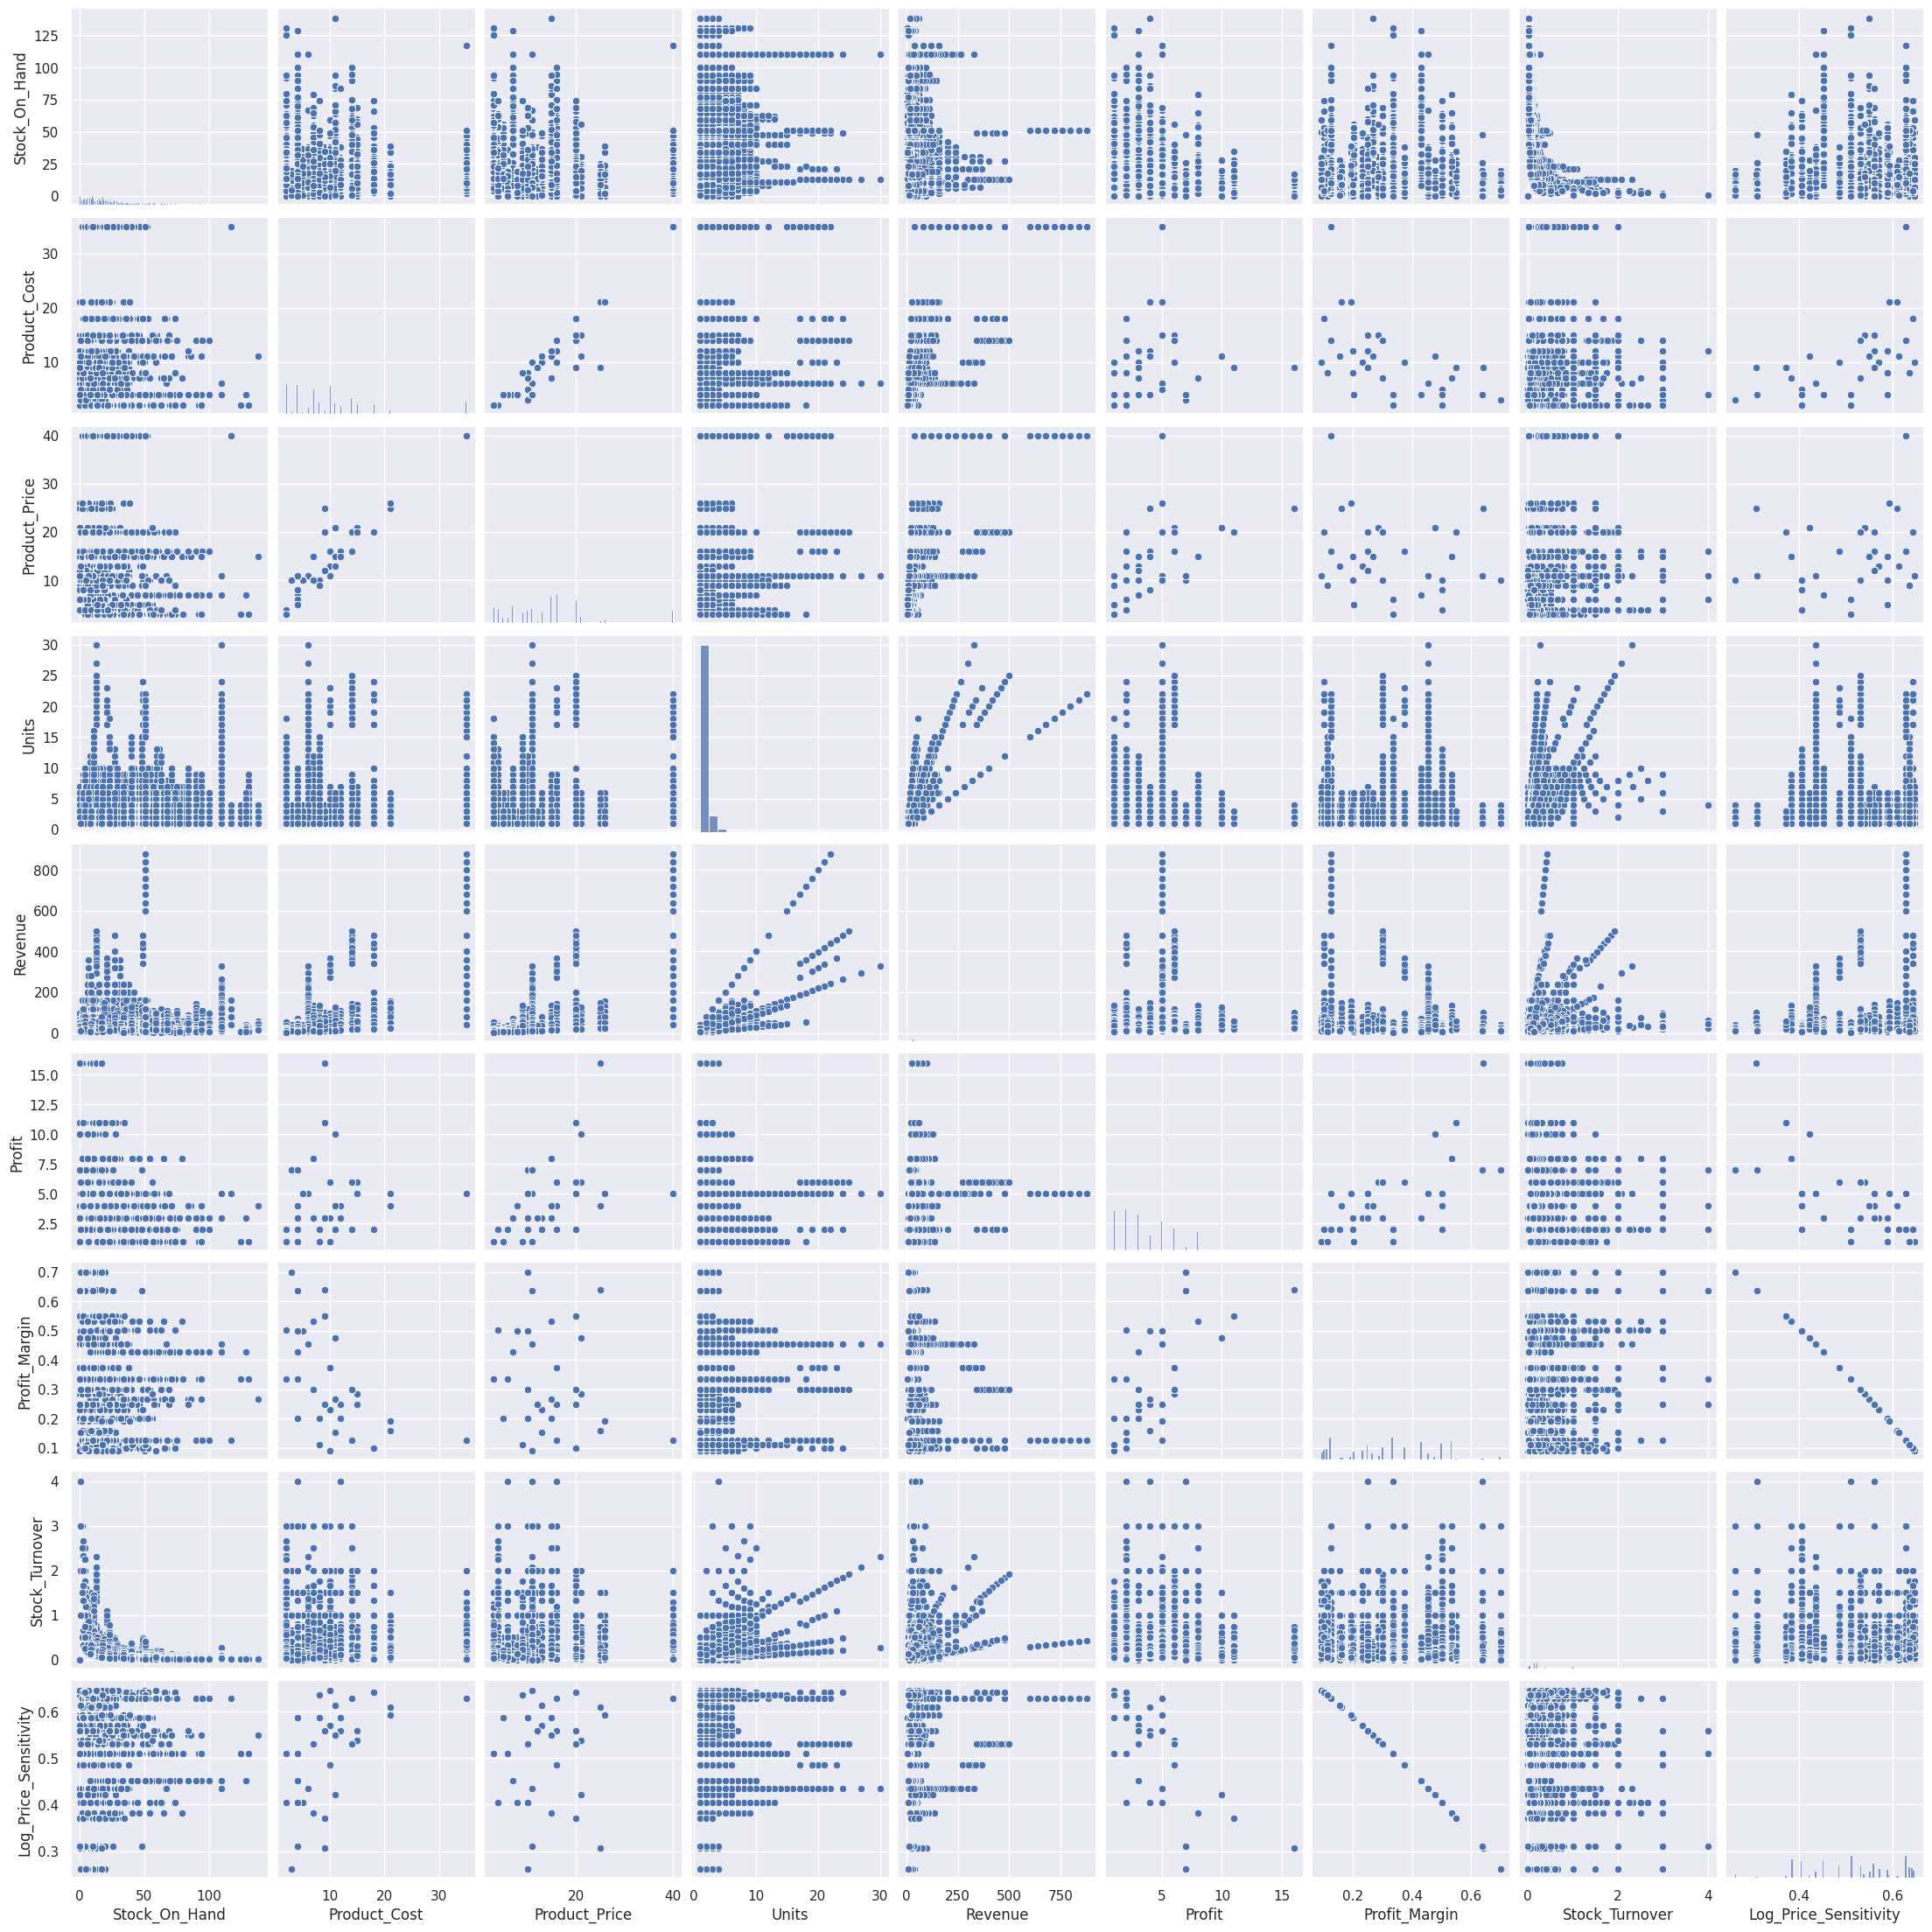

In [335]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Stock_On_Hand', 'Product_Cost', 'Product_Price', 'Units', 'Revenue', 'Profit', 'Profit_Margin', 'Stock_Turnover', 'Log_Price_Sensitivity']])
plt.show()

In [33]:
columns_to_plot = ['Stock_On_Hand', 'Product_Cost', 'Product_Price', 'Units', 'Revenue',
                   'Profit', 'Profit_Margin', 'Stock_Turnover', 'Log_Price_Sensitivity']

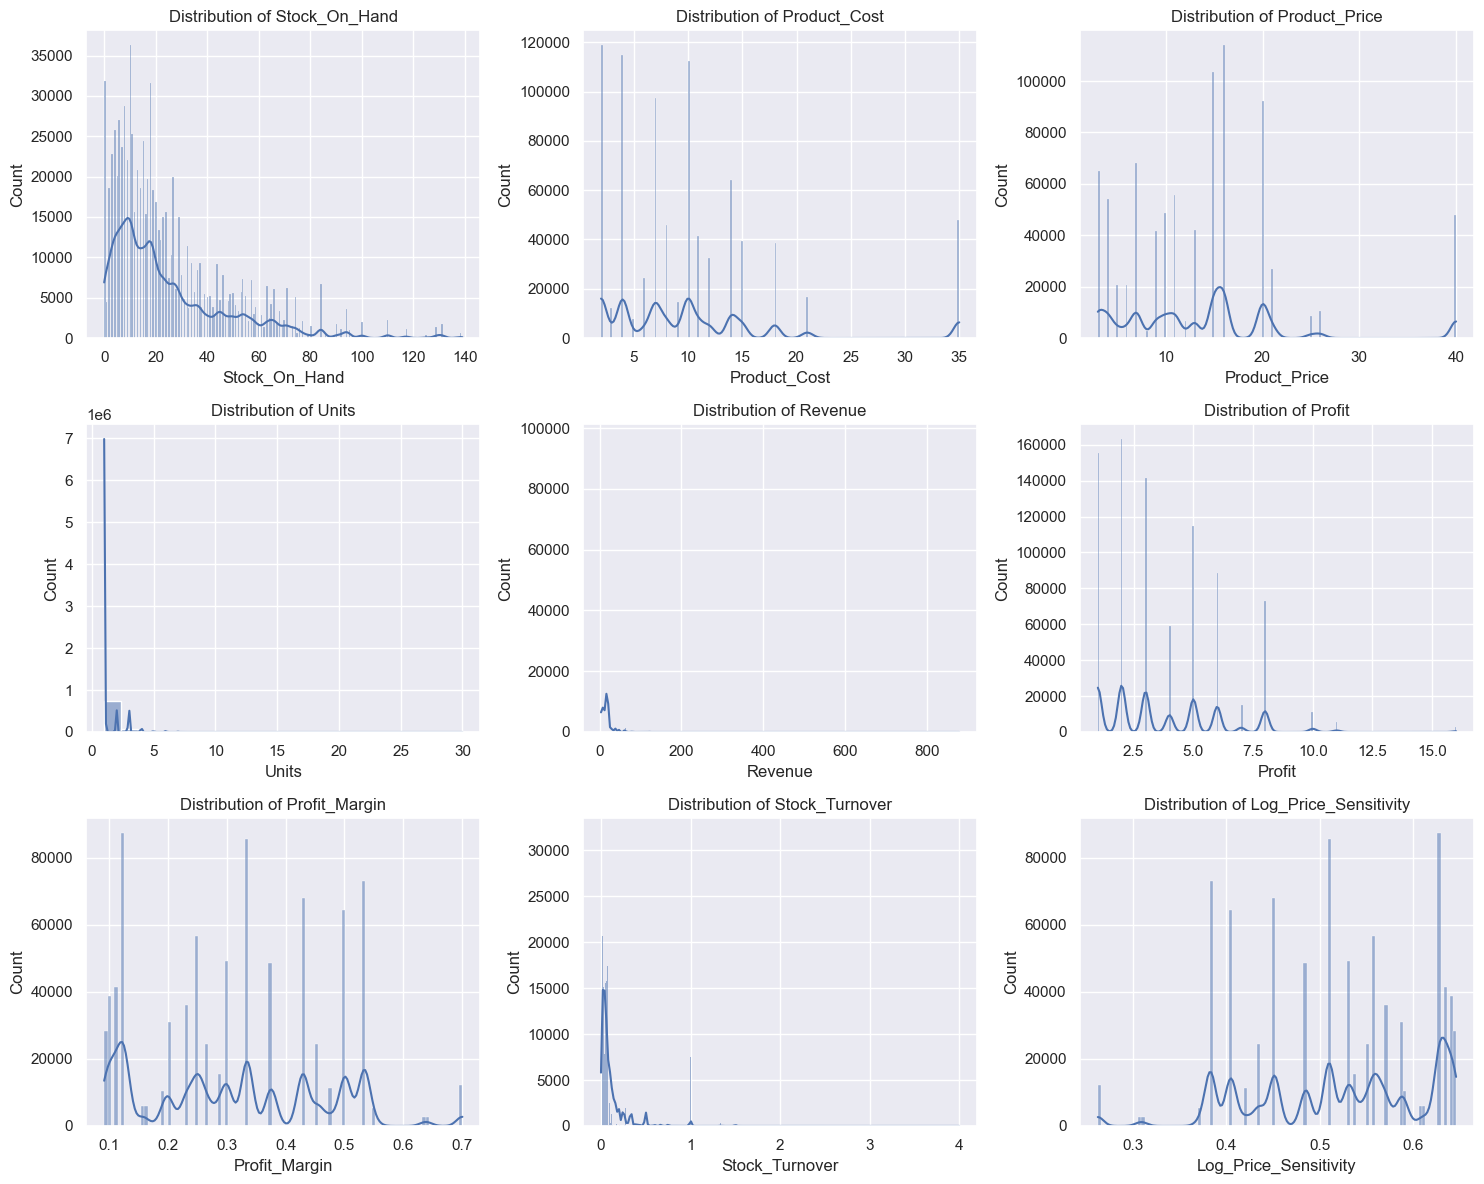

In [35]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

Outliers in Stock_On_Hand, Product Cost, Price and Units

In [36]:
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in columns_to_plot:
    df = remove_outliers(df, column)

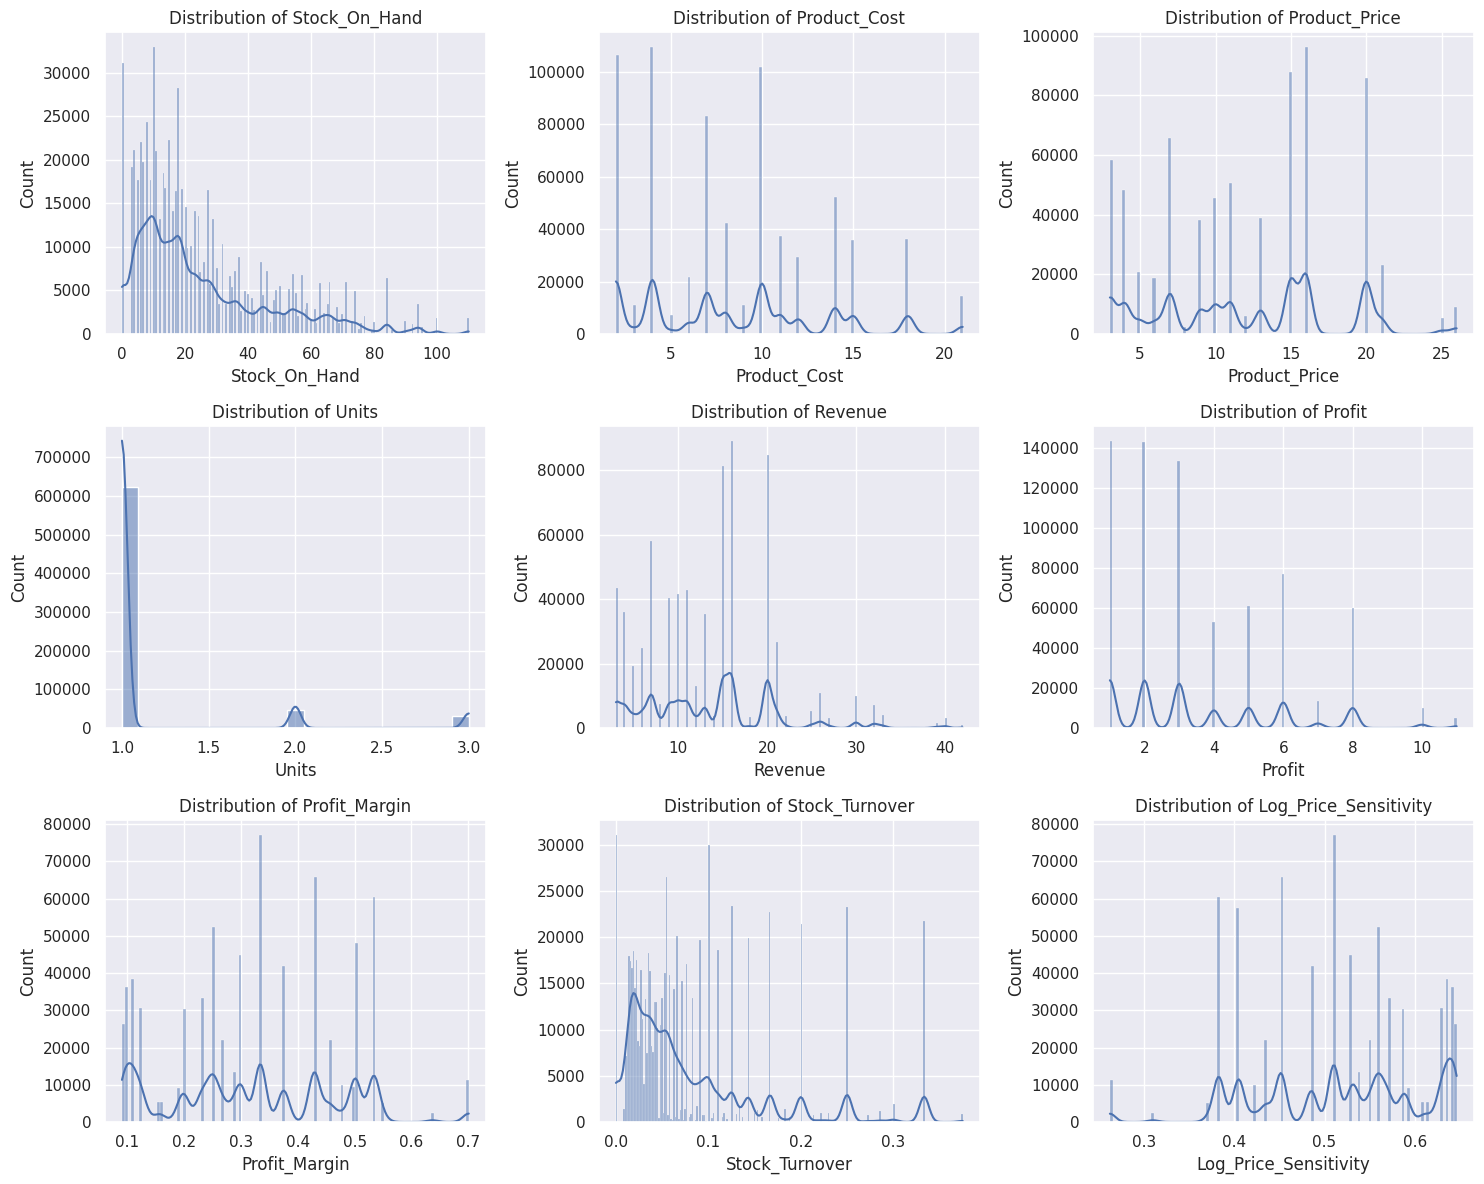

In [339]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

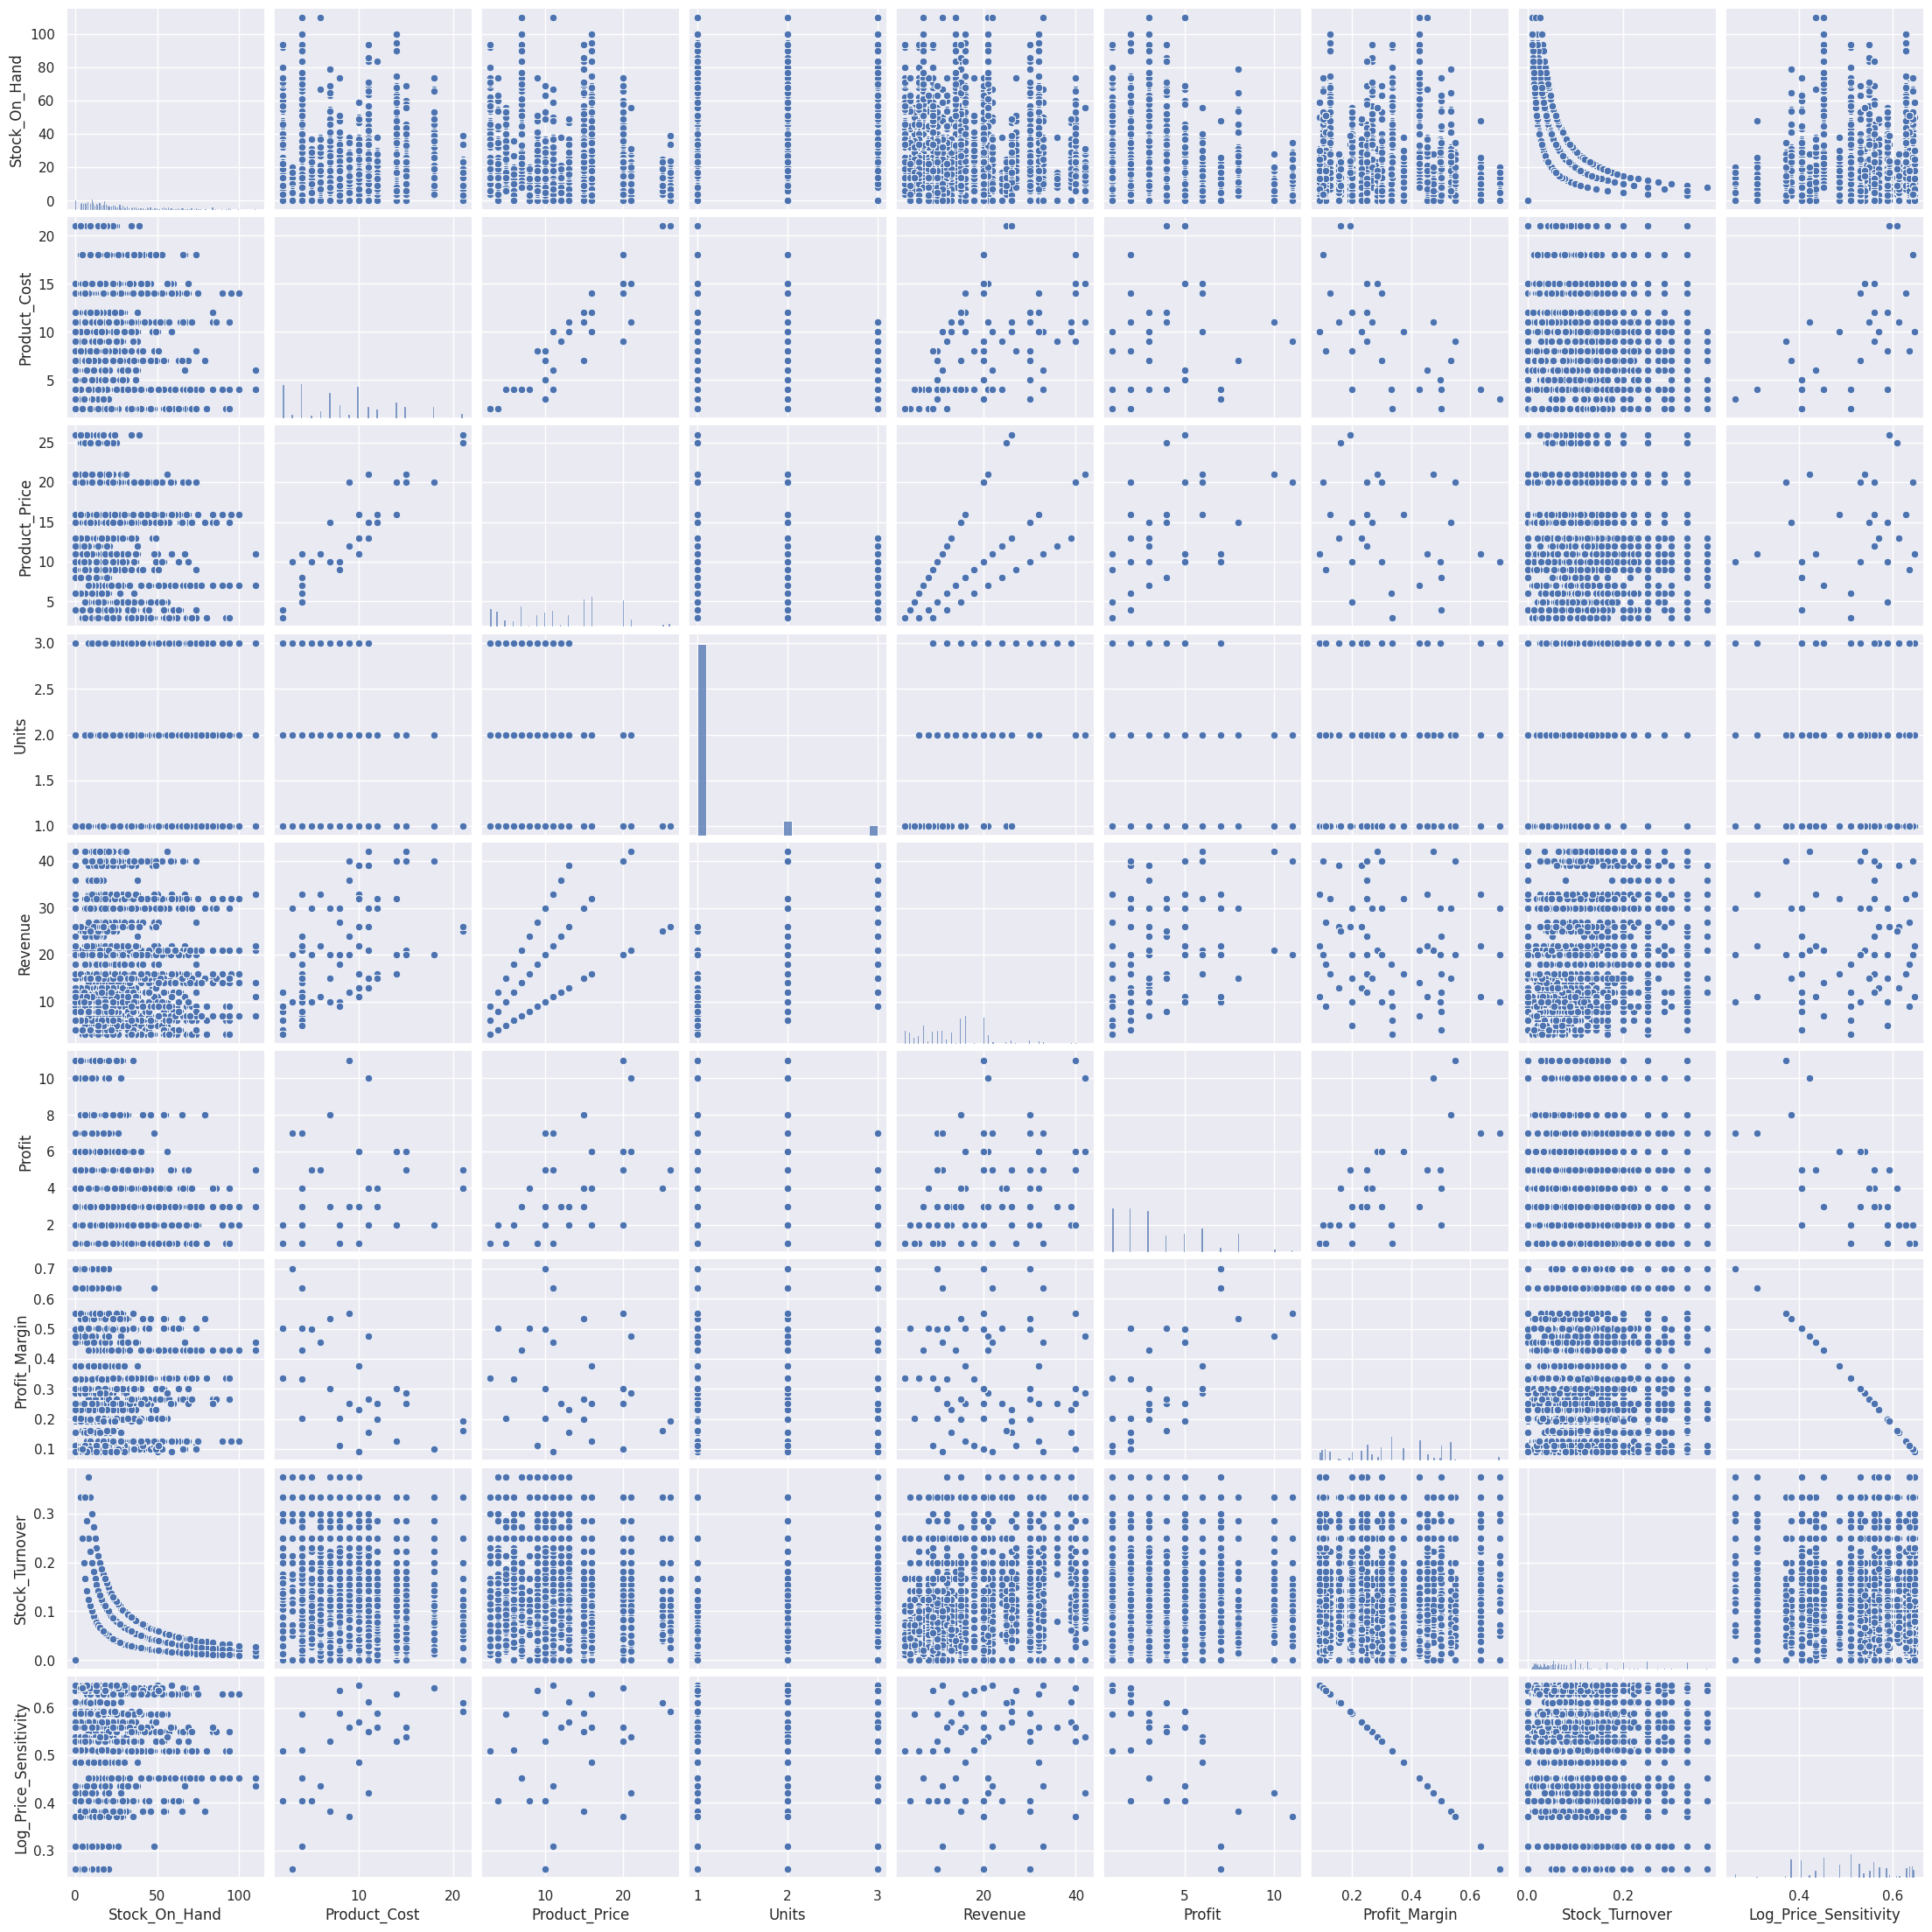

In [340]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Stock_On_Hand', 'Product_Cost', 'Product_Price', 'Units', 'Revenue', 'Profit', 'Profit_Margin', 'Stock_Turnover', 'Log_Price_Sensitivity']])
plt.show()

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700960 entries, 0 to 829264
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   Store_ID               700960 non-null  Int64          
 1   Product_ID             700960 non-null  int64          
 2   Stock_On_Hand          700960 non-null  float64        
 3   Product_Name           700960 non-null  category       
 4   Product_Category       700960 non-null  category       
 5   Product_Cost           700960 non-null  float64        
 6   Product_Price          700960 non-null  float64        
 7   Sale_ID                700960 non-null  Int64          
 8   Date                   700960 non-null  datetime64[ns] 
 9   Units                  700960 non-null  float64        
 10  Store_Name             700960 non-null  category       
 11  Store_City             700960 non-null  category       
 12  Store_Location         700960 non-n

# Analysis

How many stores?

In [342]:
df['Store_ID'].nunique()

50

How many cities?

In [343]:
df['Store_City'].nunique()

29

How many types of locations?

In [344]:
df['Store_Location'].unique()

['Residential', 'Commercial', 'Downtown', 'Airport']
Categories (4, object): ['Airport', 'Commercial', 'Downtown', 'Residential']

Oldest and newest stores?

In [345]:
stores.sort_values('Store_Open_Date')

Store_ID                     Store_Name        Store_City Store_Location  \
0          1       Maven Toys Guadalajara 1       Guadalajara    Residential   
1          2         Maven Toys Monterrey 1         Monterrey    Residential   
2          3       Maven Toys Guadalajara 2       Guadalajara     Commercial   
3          4          Maven Toys Saltillo 1          Saltillo       Downtown   
4          5            Maven Toys La Paz 1            La Paz       Downtown   
5          6          Maven Toys Mexicali 1          Mexicali     Commercial   
6          7         Maven Toys Monterrey 2         Monterrey       Downtown   
7          8           Maven Toys Pachuca 1           Pachuca       Downtown   
8          9  Maven Toys Ciudad de Mexico 1  Cuidad de Mexico       Downtown   
9         10          Maven Toys Campeche 1          Campeche       Downtown   
10        11        Maven Toys Cuernavaca 1        Cuernavaca       Downtown   
11        12          Maven Toys Chetumal 1          Chetumal       Downtown   
12        13          Maven Toys Mexicali 2          Mexicali       Downtown   
13        14        Maven Toys Guanajuato 1        Guanajuato       Downtown   
14        15  Maven Toys Tuxtla Gutierrez 1  Tuxtla Gutierrez       Downtown   
15        16   Maven Toys San Luis Potosi 1   San Luis Potosi       Downtown   
16        17            Maven Toys Toluca 1            Toluca       Downtown   
17        18            Maven Toys Merida 1            Merida       Downtown   
18        19            Maven Toys Puebla 1            Puebla     Commercial   
19        20         Maven Toys Zacatecas 1         Zacatecas       Downtown   
20        21          Maven Toys Santiago 1          Santiago       Downtown   
21        22        Maven Toys Guanajuato 2        Guanajuato     Commercial   
22        23         Maven Toys Chihuahua 1         Chihuahua     Commercial   
23        24    Maven Toys Aguascalientes 1    Aguascalientes       Downtown   
24        25   Maven Toys Ciudad Victoria 1   Ciudad Victoria       Downtown   
25        26          Maven Toys Campeche 2          Campeche     Commercial   
26        27            Maven Toys Oaxaca 1            Oaxaca       Downtown   
27        28            Maven Toys Puebla 2            Puebla       Downtown   
28        29            Maven Toys Xalapa 1            Xalapa     Commercial   
29        30       Maven Toys Guadalajara 3       Guadalajara        Airport   
30        31  Maven Toys Ciudad de Mexico 2  Cuidad de Mexico        Airport   
31        32        Maven Toys Hermosillo 1        Hermosillo    Residential   
32        33         Maven Toys Monterrey 3         Monterrey        Airport   
33        34      Maven Toys Villahermosa 1      Villahermosa       Downtown   
34        35      Maven Toys Chilpancingo 1      Chilpancingo       Downtown   
35        36           Maven Toys Morelia 1           Morelia       Downtown   
36        37  Maven Toys Ciudad de Mexico 3  Cuidad de Mexico    Residential   
37        38         Maven Toys Chihuahua 2         Chihuahua       Downtown   
38        39            Maven Toys Xalapa 2            Xalapa       Downtown   
39        40            Maven Toys Toluca 2            Toluca     Commercial   
40        41        Maven Toys Hermosillo 2        Hermosillo       Downtown   
41        42        Maven Toys Hermosillo 3        Hermosillo     Commercial   
42        43           Maven Toys Durango 1           Durango       Downtown   
43        44            Maven Toys Puebla 3            Puebla    Residential   
44        45  Maven Toys Ciudad de Mexico 4  Cuidad de Mexico     Commercial   
45        46       Maven Toys Guadalajara 4       Guadalajara       Downtown   
46        47         Maven Toys Monterrey 4         Monterrey     Commercial   
47        48          Maven Toys Saltillo 2          Saltillo     Commercial   
48        49          Maven Toys Culiacan 1          Culiacan       Downtown   
49  

How many products?

In [346]:
df['Product_Name'].nunique()

33

How many categories and number of products in each?

In [347]:
products['Product_Category'].value_counts()

Product_Category
Toys                 9
Art & Crafts         8
Games                8
Sports & Outdoors    7
Electronics          3
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\2714567875.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product_Name')[column].mean().sort_values(ascending=False).reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\2714567875.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product_Name')[column].mean().sort_values(ascending=False).reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\2714567875.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

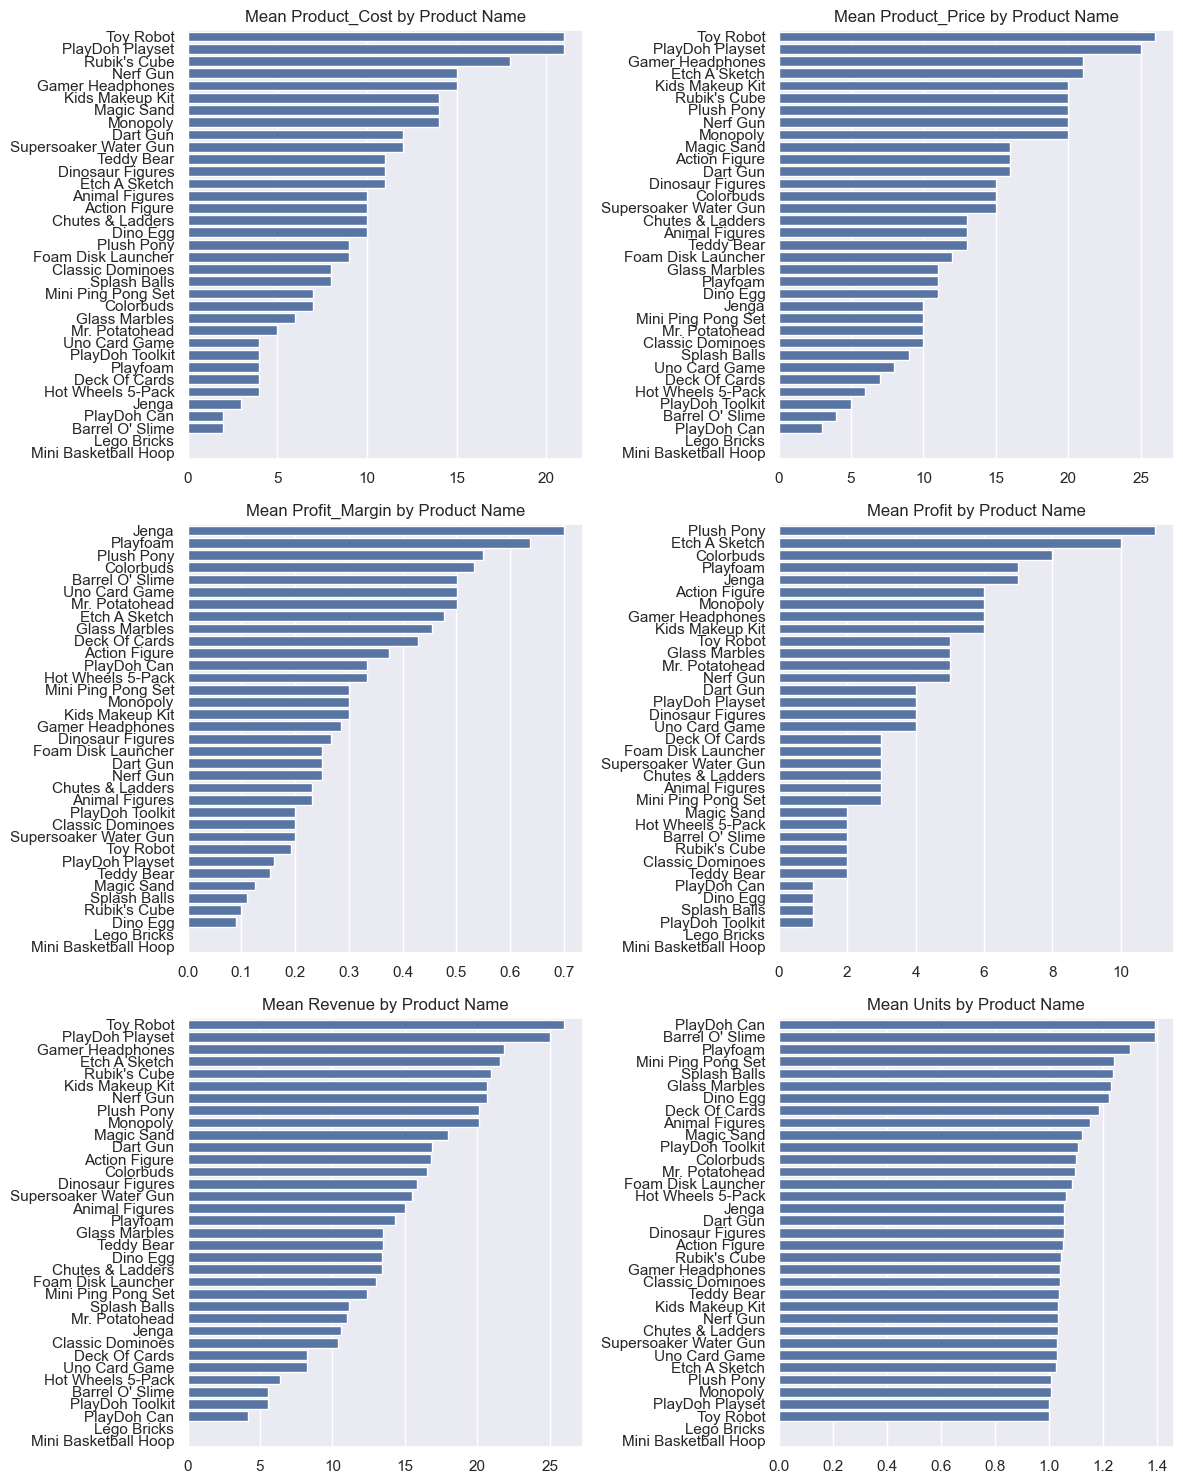

In [78]:
columns_to_plot = ['Product_Cost', 'Product_Price', 'Profit_Margin', 'Profit', 'Revenue', 'Units']

plt.figure(figsize=(12, 15))

for i, column in enumerate(columns_to_plot, start=1): 
    plt.subplot(3, 2, i)

    top_products = df.groupby('Product_Name')[column].mean().sort_values(ascending=False).reset_index()

    sns.barplot(x=column, y='Product_Name', data=top_products, order=top_products['Product_Name'])
    plt.title(f'Mean {column} by Product Name')
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

High Cost and Price: Products like Toy Robot, PlayDoh Playset, and Rubik's Cube have high mean costs and prices. These products also generate significant revenue, indicating their popularity despite higher costs.

Profit Margins: Products such as Jenga, Playfoam, and Plush Pony have high profit margins. However, they may not necessarily lead to the highest revenue, as their prices might be lower, but their cost-to-profit ratio is favorable.

Top Profits: Plush Pony, Etch A Sketch, and Colorbuds show the highest profits, indicating they are not only cost-effective but also likely to generate high returns.

Revenue Drivers: Toy Robot, PlayDoh Playset, and Gamer Headphones are major revenue drivers, showcasing their high demand and consistent sales across units and profit.

Units Sold: Low-cost products like PlayDoh Can, Barrel O' Slime, and Playfoam move a higher volume of units, which compensates for their lower individual prices.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3650875331.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product_Category')[column].mean().sort_values(ascending=False).reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3650875331.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product_Category')[column].mean().sort_values(ascending=False).reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3650875331.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. 

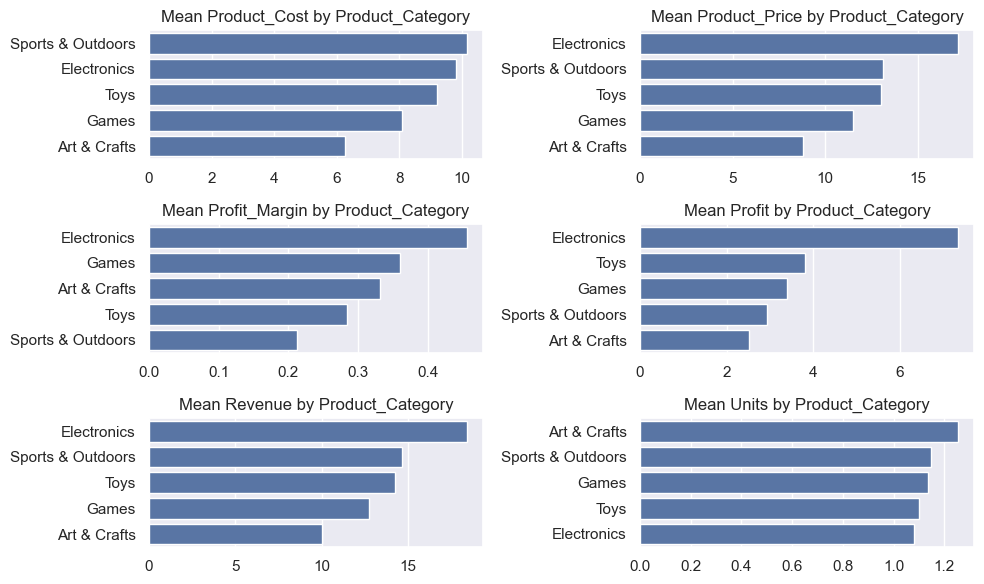

In [81]:
columns_to_plot = ['Product_Cost', 'Product_Price', 'Profit_Margin', 'Profit', 'Revenue', 'Units']

plt.figure(figsize=(10, 6))

for i, column in enumerate(columns_to_plot, start=1): 
    plt.subplot(3, 2, i)

    top_products = df.groupby('Product_Category')[column].mean().sort_values(ascending=False).reset_index()

    sns.barplot(x=column, y='Product_Category', data=top_products, order=top_products['Product_Category'])
    plt.title(f'Mean {column} by Product_Category')
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

Product Cost & Price:

Electronics has the highest average product cost and price, indicating that these items are premium offerings compared to other categories like Art & Crafts, which have the lowest cost and price.
Sports & Outdoors also carries higher costs and prices, but less than electronics.
Profit Margin:

Electronics has the highest profit margin, showing that despite its high cost, it is also highly profitable.
Sports & Outdoors lags behind other categories in terms of profit margin, suggesting room for cost optimization or price adjustments.
Profit:

Unsurprisingly, Electronics is the most profitable category by a large margin, followed by Toys and Games.
Art & Crafts and Sports & Outdoors show lower profitability despite being relatively high in sales volume (units).
Revenue:

Electronics dominates revenue generation, followed by Sports & Outdoors and Toys.
Art & Crafts contributes the least to revenue, suggesting it may be a low-margin, high-volume product category.
Units Sold:

Art & Crafts has the highest units sold, indicating it is likely a low-cost, high-demand category.
Electronics despite being the most profitable, has the lowest units sold, reinforcing the idea that its high profitability stems from high price rather than volume.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3244530728.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Store_Name')['Product_ID'].nunique().reset_index()


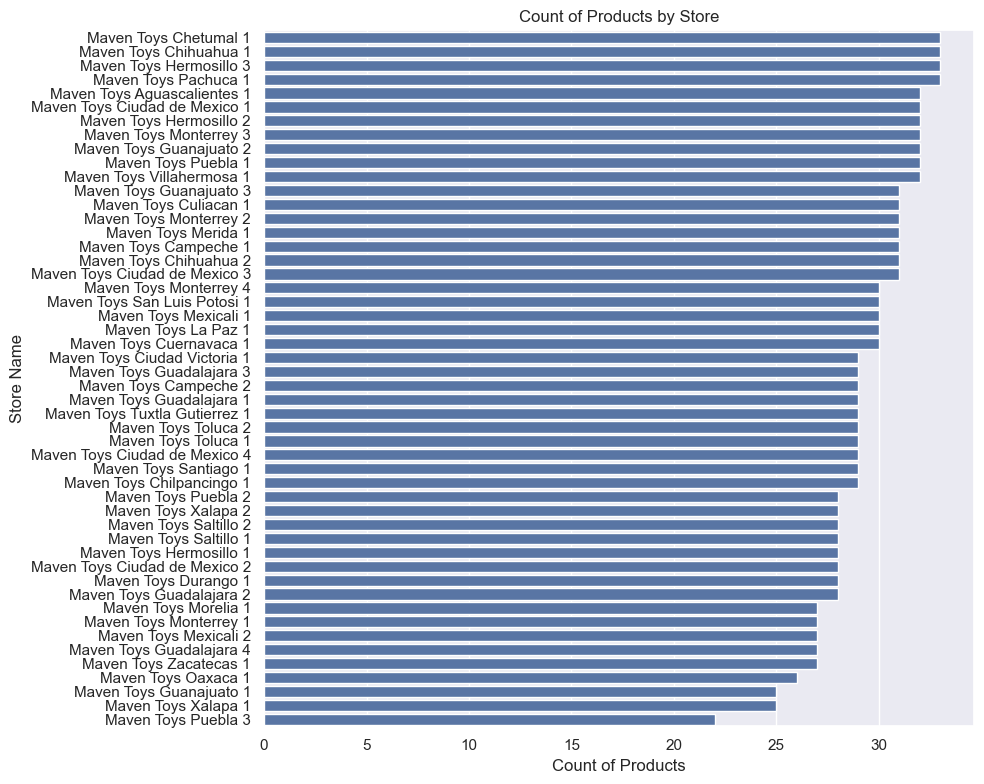

In [82]:
top_products = df.groupby('Store_Name')['Product_ID'].nunique().reset_index()
top_products = top_products.sort_values(by='Product_ID', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Product_ID', y='Store_Name', data=top_products, order=top_products['Store_Name'])
plt.xlabel('Count of Products')
plt.ylabel('Store Name')
plt.title('Count of Products by Store')
plt.tight_layout()
plt.show()

Maven Toys Chetumal 1 and Maven Toys Chihuahua 1 have the highest product count, with nearly 25 products.  
Other stores, such as Maven Toys Puebla 3 and Maven Toys Oaxaca, have significantly fewer products in their inventories, with only a few listed.  
There is a wide variation in the number of products available per store, which could indicate differences in store size, location importance, or target markets.  
Stores with more products might serve larger or more diverse customer bases, while stores with fewer products could be specialized or located in smaller markets.  

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3018471274.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Store_Name')[column].mean().sort_values(ascending=False).reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3018471274.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Store_Name')[column].mean().sort_values(ascending=False).reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3018471274.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

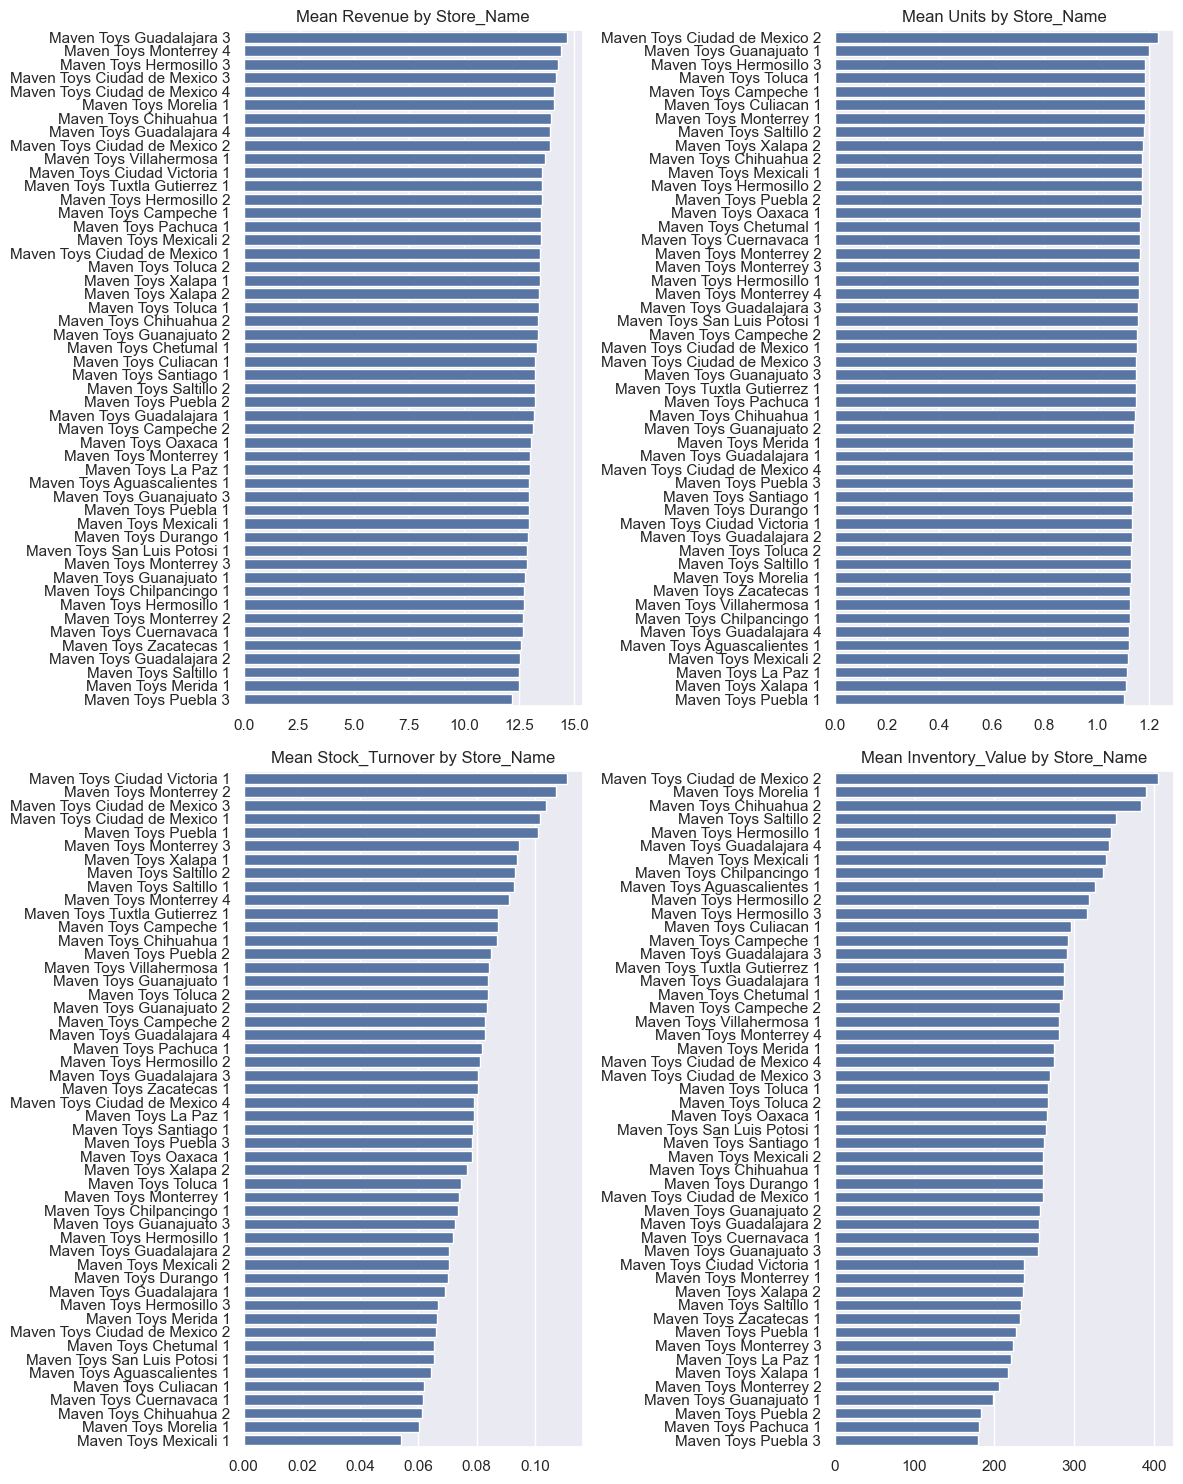

In [98]:
columns_to_plot = ['Revenue', 'Units', 'Stock_Turnover', 'Inventory_Value']

plt.figure(figsize=(12, 15))

for i, column in enumerate(columns_to_plot, start=1): 
    plt.subplot(2, 2, i)

    top_products = df.groupby('Store_Name')[column].mean().sort_values(ascending=False).reset_index()

    sns.barplot(x=column, y='Store_Name', data=top_products, order=top_products['Store_Name'])
    plt.title(f'Mean {column} by Store_Name')
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

Revenue Distribution: Stores like Maven Toys Guadalajara 3 and Maven Toys Ciudad de Mexico 2 show the highest mean revenue, suggesting these locations are likely in high-demand markets. On the other hand, stores such as Maven Toys Puebla 3 and Maven Toys Hermosillo 2 have much lower mean revenue, indicating either lower demand or inefficiencies.

Units Sold: Maven Toys Ciudad de Mexico 1 and Maven Toys Guanajuato 1 lead in the number of units sold on average. This suggests these stores are moving more inventory, possibly indicating strong customer foot traffic or better product alignment with customer needs.

Stock Turnover: Maven Toys Ciudad Victoria 1 and Maven Toys Morelia 1 show the highest stock turnover rates. High turnover is generally a good indicator of efficient inventory management. Stores with lower turnover, such as Maven Toys Puebla 3, might be overstocked or dealing with slow-moving products.

Inventory Value: Maven Toys Ciudad de Mexico 2 and Maven Toys Chihuahua 2 have the highest mean inventory values, while stores like Maven Toys Puebla 3 have lower inventory values. This likely correlates with their overall sales and revenue performance.

Hypotheses and Potential Decisions:
Stock Optimization: Locations with low stock turnover, such as Maven Toys Puebla 3, may require a review of their inventory strategy. Reducing excess stock or shifting product categories could help improve turnover and reduce holding costs.

Expansion Potential: High-revenue stores such as Maven Toys Guadalajara 3 could be candidates for expansion, either by increasing their product offerings or adding new branches in similar high-demand locations.

Revenue Growth Focus: Stores with lower revenues but high units sold, such as Maven Toys Guanajuato 1, may benefit from targeted marketing efforts or adjustments to pricing strategies to increase revenue per sale.

<ipython-input-355-0d9f2e81890b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product_Name')['Stock_On_Hand'].sum().reset_index()


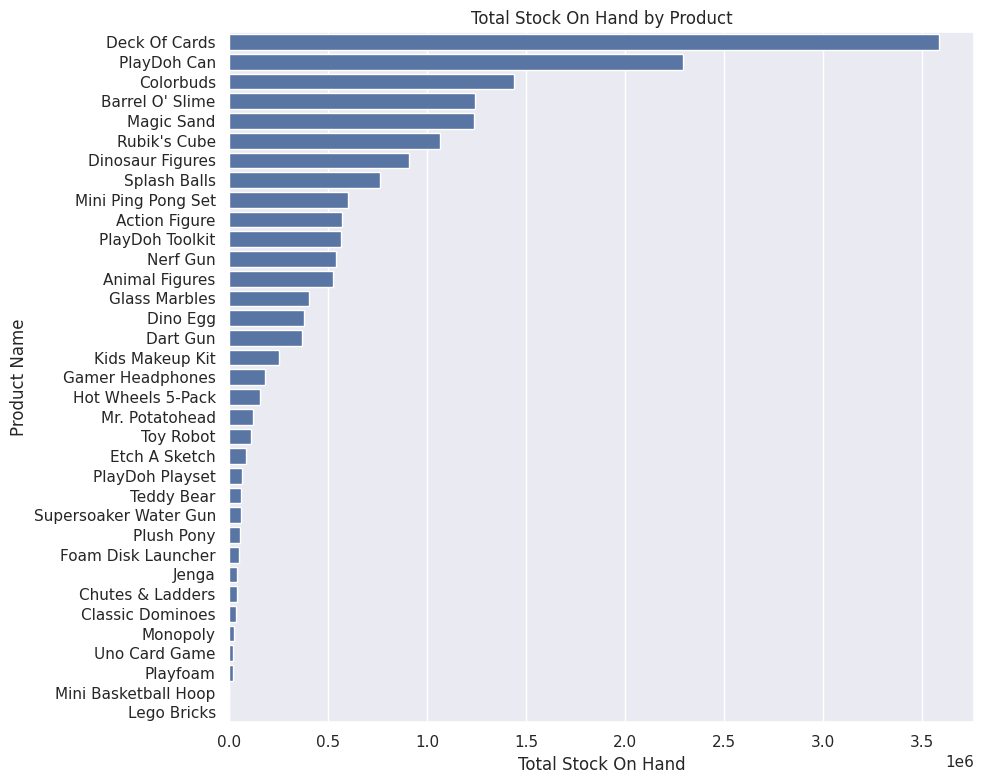

In [355]:
top_products = df.groupby('Product_Name')['Stock_On_Hand'].sum().reset_index()
top_products = top_products.sort_values(by='Stock_On_Hand', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Stock_On_Hand', y='Product_Name', data=top_products, order=top_products['Product_Name'])
plt.xlabel('Total Stock On Hand')
plt.ylabel('Product Name')
plt.title('Total Stock On Hand by Product')
plt.tight_layout()
plt.show()

Deck of Cards and Colorbuds have the highest total stock on hand, indicating that these products are heavily stocked compared to others.  
Products like PlayDoh Can and Rubik's Cube also have significant stock levels but are much lower compared to the top two.  
Many products, such as Etch A Sketch, Lego Bricks, and Gamer Headphones, have minimal stock on hand, suggesting they are either less popular or restocked less frequently.  
Products with high stock might be slow sellers, leading to accumulated stock.  
Products with lower stock might be fast sellers or less frequently restocked due to higher demand or production constraints.  

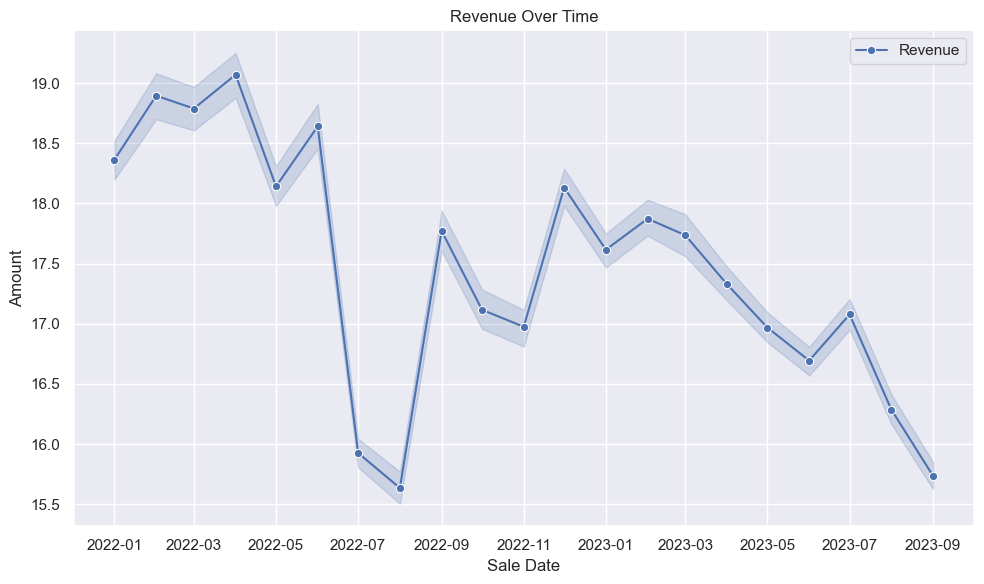

In [32]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Year'].astype(str) + '-' + df['Sale_Month'].astype(str))

plt.figure(figsize=(10, 6))
sns.lineplot(x='Sale_Date', y='Revenue', data=df, label='Revenue', marker='o')
plt.xlabel('Sale Date')
plt.ylabel('Amount')
plt.title('Revenue Over Time')
plt.legend()
plt.tight_layout()
plt.show()

Peaks and Troughs: Revenue fluctuates significantly over the course of the observed period. It starts relatively high in early 2022, experiences a noticeable dip around mid-2022, recovers, but continues to decline steadily through 2023.

Major Dip: A significant drop in revenue occurs between June and August of 2022, followed by a recovery in September. This dip might correspond to seasonal trends or specific market events.

Steady Decline in 2023: After the recovery in late 2022, revenue shows a general downward trend throughout 2023, with no significant upturn.

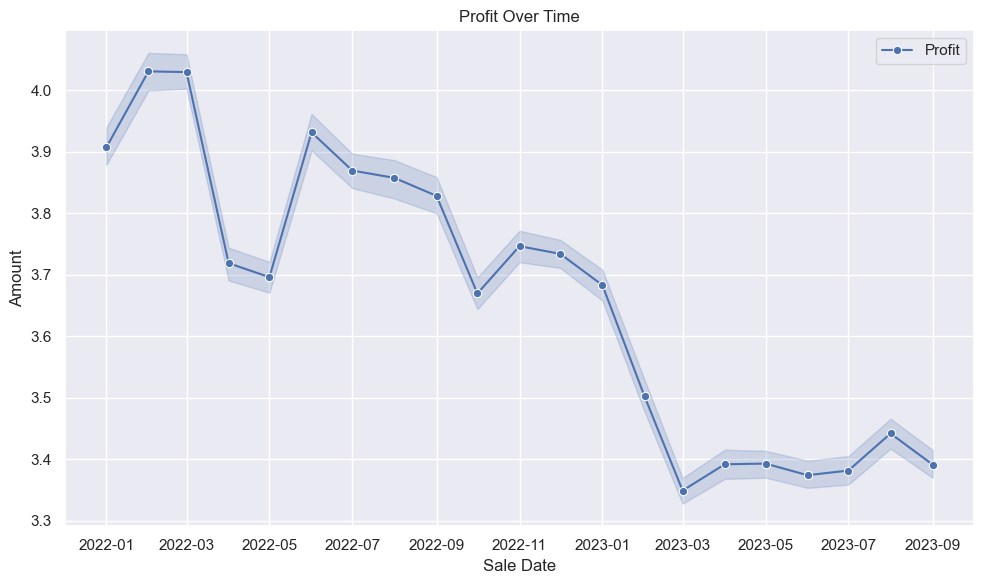

In [174]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sale_Date', y='Profit', data=df, label='Profit', marker='o')
plt.xlabel('Sale Date')
plt.ylabel('Amount')
plt.title('Profit Over Time')
plt.legend()
plt.tight_layout()
plt.show()

Sharp Decreases: There are significant declines in revenue at two points, one around mid-2022 and another in mid-2023. These drops are followed by partial recoveries, but the overall trend seems to be a gradual decline.

Revenue Recovery: After the sharp decline mid-2022, there is a noticeable rebound toward the end of 2022, but this recovery is not sustained in the long term.

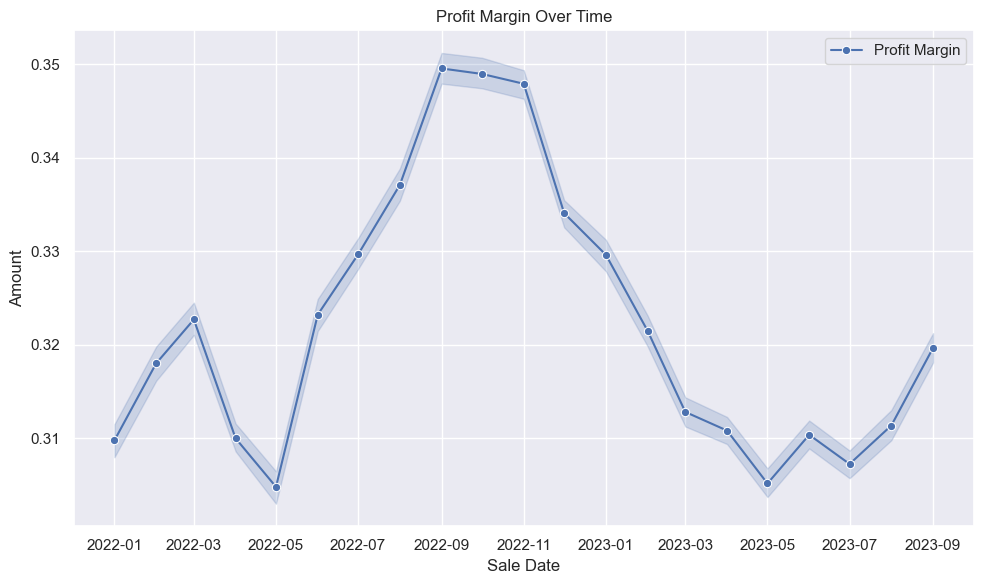

In [175]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sale_Date', y='Profit_Margin', data=df, label='Profit Margin', marker='o')
plt.xlabel('Sale Date')
plt.ylabel('Amount')
plt.title('Profit Margin Over Time')
plt.legend()
plt.tight_layout()
plt.show()

Fluctuations in Profit Margin: The profit margin peaks around mid-2022 and begins to decline, reaching its lowest point in mid-2023. After this, there is a slight recovery by the end of the period.

Steep Decline in Late 2022: There is a sharp decline in profit margin after the peak in mid-2022, which continues steadily until mid-2023. This suggests that the company may have faced higher costs or lower pricing power during this time.

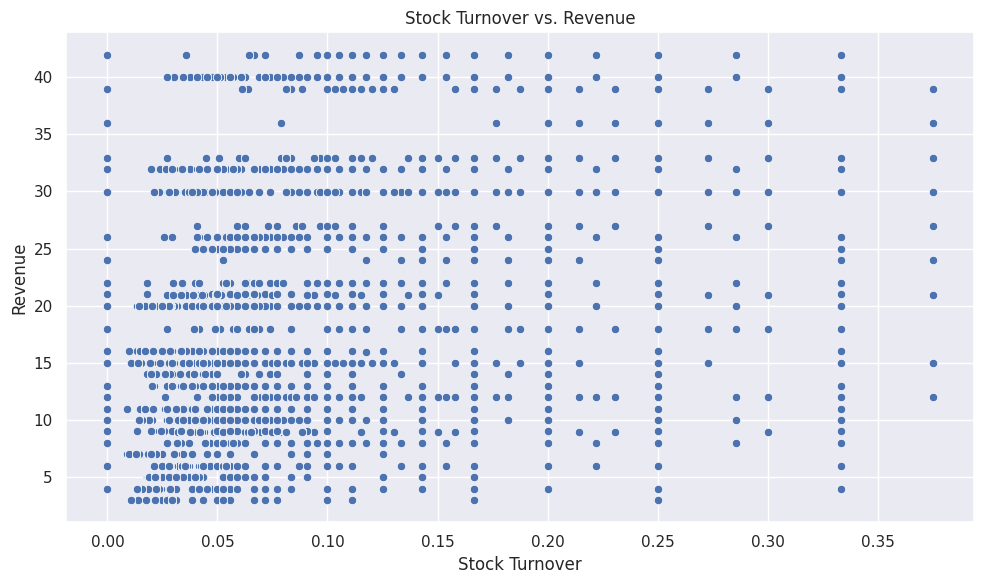

In [360]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stock_Turnover', y='Revenue', data=df)
plt.xlabel('Stock Turnover')
plt.ylabel('Revenue')
plt.title('Stock Turnover vs. Revenue')
plt.tight_layout()
plt.show()

No Clear Correlation: There is no evident linear or strong correlation between stock turnover and revenue. Stock turnover appears to vary with a range of revenue values, and no clear pattern emerges.

Concentration Around Low Stock Turnover: A significant number of data points are concentrated in the range of stock turnover below 1.0, but the revenue associated with these low turnover values shows a wide spread from near 0 to 80.

Sparse Data for Higher Stock Turnover: For stock turnover values above 1.5, the data points are sparse, making it difficult to determine any trends for higher stock turnover values.

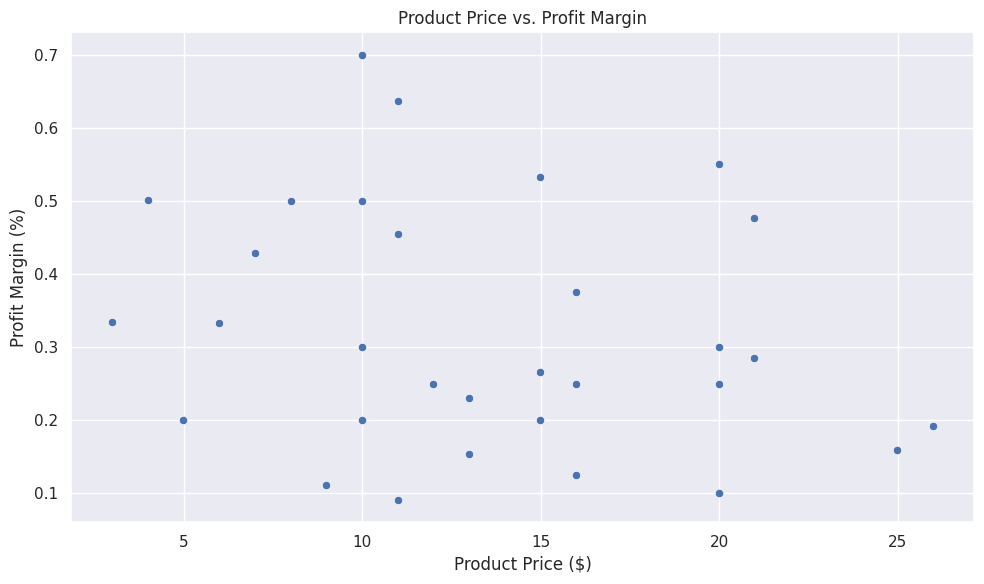

In [361]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product_Price', y='Profit_Margin', data=df)
plt.xlabel('Product Price ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Product Price vs. Profit Margin')
plt.tight_layout()
plt.show()

No Strong Correlation: There is no clear or strong relationship between product price and profit margin. The profit margin is spread across different price points, without a clear trend that higher-priced products yield higher profit margins.

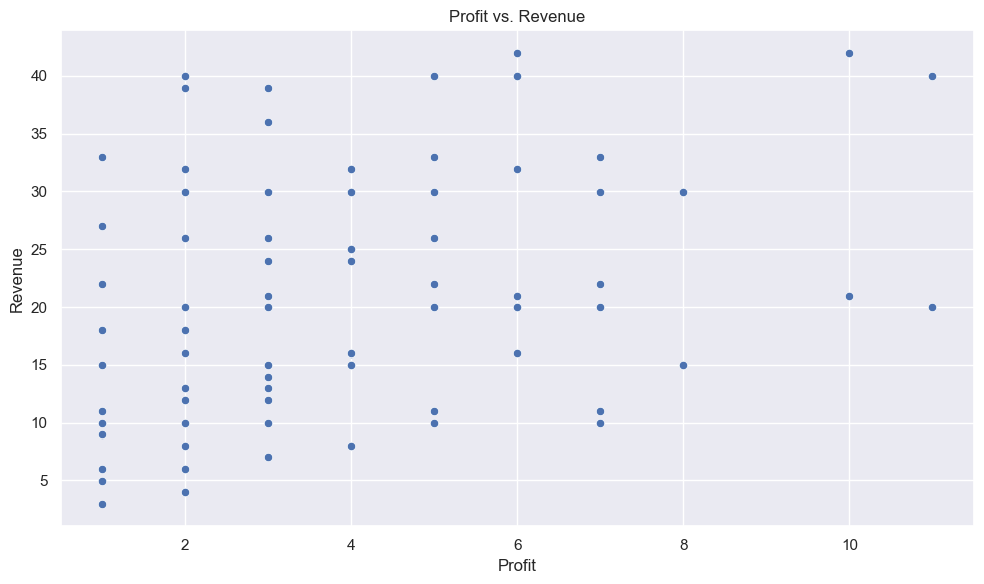

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profit', y='Revenue', data=df)
plt.xlabel('Profit')
plt.ylabel('Revenue')
plt.title('Profit vs. Revenue')
plt.tight_layout()
plt.show()

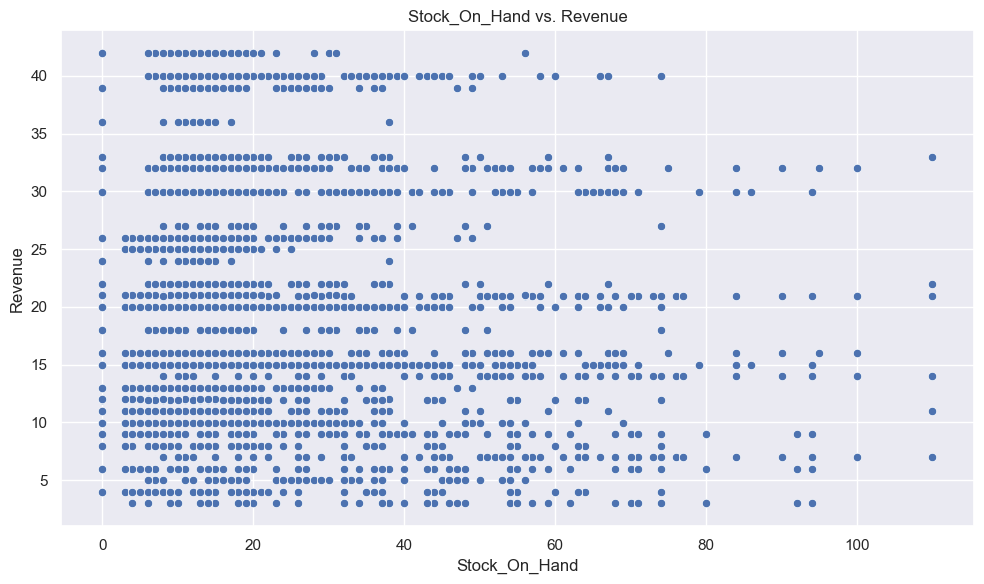

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stock_On_Hand', y='Revenue', data=df)
plt.xlabel('Stock_On_Hand')
plt.ylabel('Revenue')
plt.title('Stock_On_Hand vs. Revenue')
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\2387638466.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = df.groupby('Store_Location')['Units'].sum().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\2387638466.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = df.groupby('Store_Location')['Units'].sum().reset_index()


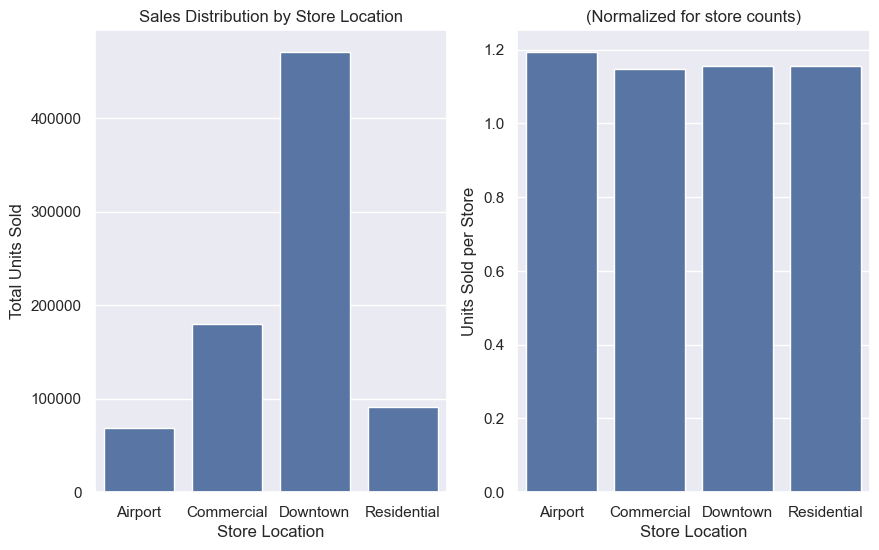

In [119]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sales_by_location = df.groupby('Store_Location')['Units'].sum().reset_index()

sns.barplot(x='Store_Location', y='Units', data=sales_by_location)
plt.xlabel('Store Location')
plt.ylabel('Total Units Sold')
plt.title('Sales Distribution by Store Location')

store_counts = df['Store_Location'].value_counts()
sales_by_location = df.groupby('Store_Location')['Units'].sum().reset_index()
sales_by_location['Store_Count'] = sales_by_location['Store_Location'].map(store_counts).astype(int)
sales_by_location['Units_per_Store'] = sales_by_location['Units'] / sales_by_location['Store_Count']

plt.subplot(1, 2, 2)
sns.barplot(x='Store_Location', y='Units_per_Store', data=sales_by_location)
plt.xlabel('Store Location')
plt.ylabel('Units Sold per Store')
plt.title('(Normalized for store counts)')
plt.show()

Highest Sales in Downtown: The downtown store locations significantly outperform the other store locations in terms of total units sold, with over 500,000 units. This suggests that downtown locations may experience higher foot traffic or customer demand.

Commercial Locations: The commercial locations also show relatively strong sales, though they are roughly half of what is observed in downtown locations.

Lower Sales in Airport and Residential Locations: Airport and residential store locations have the lowest total units sold, with residential stores performing slightly better than airport locations. This may be due to less frequent visits by customers or fewer high-demand products.

Hypotheses for Further Analysis:
Store Size and Inventory: The differences in sales might be influenced by store size or the range of products available at each location. Investigating inventory levels or product variety at each store location could provide more insights.

Minimal Variation: The units sold per store across different store locations show very little variation. All locations—Airport, Commercial, Downtown, and Residential—have almost the same average units sold per store, indicating similar performance across store types after normalizing for the number of stores.

Slightly Higher Sales at Airport Locations: There is a slight increase in units sold per store in airport locations compared to the other locations, but the difference is not very large.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3369060462.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = df.groupby('Store_Location')['Revenue'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3369060462.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = df.groupby('Store_Location')['Revenue'].mean().reset_index()


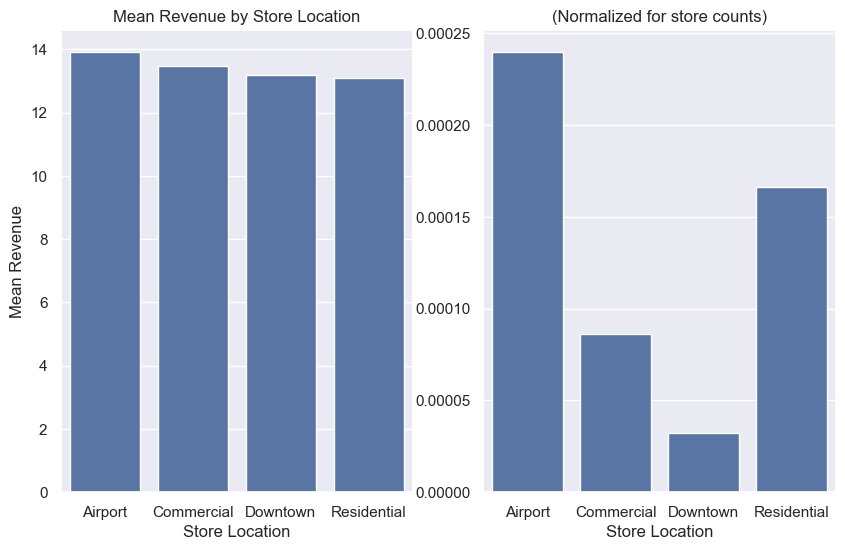

In [122]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sales_by_location = df.groupby('Store_Location')['Revenue'].mean().reset_index()

sns.barplot(x='Store_Location', y='Revenue', data=sales_by_location)
plt.xlabel('Store Location')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Store Location')

store_counts = df['Store_Location'].value_counts()
sales_by_location = df.groupby('Store_Location')['Revenue'].mean().reset_index()
sales_by_location['Store_Count'] = sales_by_location['Store_Location'].map(store_counts).astype(int)
sales_by_location['Revenue_per_Store'] = sales_by_location['Revenue'] / sales_by_location['Store_Count']

plt.subplot(1, 2, 2)
sns.barplot(x='Store_Location', y='Revenue_per_Store', data=sales_by_location)
plt.xlabel('Store Location')
plt.ylabel('')
plt.title('(Normalized for store counts)')
plt.show()

<ipython-input-365-8123daef4843>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df.groupby('Product_Name')['Revenue'].sum().nlargest(5).index
<ipython-input-365-8123daef4843>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_products['Product_Name'] = df_top_products['Product_Name'].astype(str).astype('category')
<ipython-input-365-8123daef4843>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adop

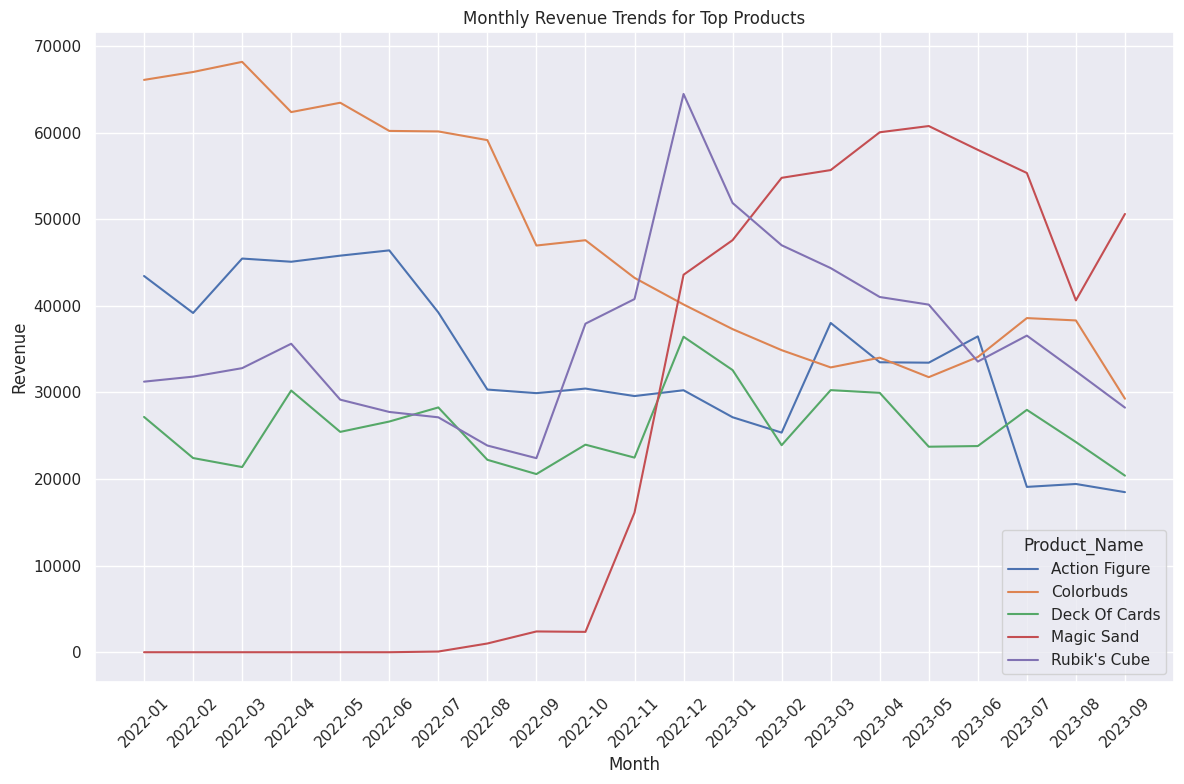

In [365]:
df['Sale_Month'] = df['Date'].dt.to_period('M')
top_products = df.groupby('Product_Name')['Revenue'].sum().nlargest(5).index
df_top_products = df[df['Product_Name'].isin(top_products)]
df_top_products['Product_Name'] = df_top_products['Product_Name'].astype(str).astype('category')

monthly_revenue = df_top_products.groupby(['Sale_Month', 'Product_Name'])['Revenue'].sum().reset_index()
monthly_revenue['Sale_Month'] = monthly_revenue['Sale_Month'].astype(str)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Sale_Month', y='Revenue', hue='Product_Name', data=monthly_revenue)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trends for Top Products')
plt.tight_layout()
plt.show()

Seasonal Demand: The spike in revenue for Rubik's Cube and Magic Sand in late 2022 (likely around the holiday season) suggests that these products may be popular gift items. Further analysis by quarter or week could confirm if this trend consistently happens around holidays.

Marketing Influence: The sudden increase in sales for specific products during certain months could be tied to marketing campaigns or promotions. Investigating marketing spend or promotions during this time could help explain the trends.

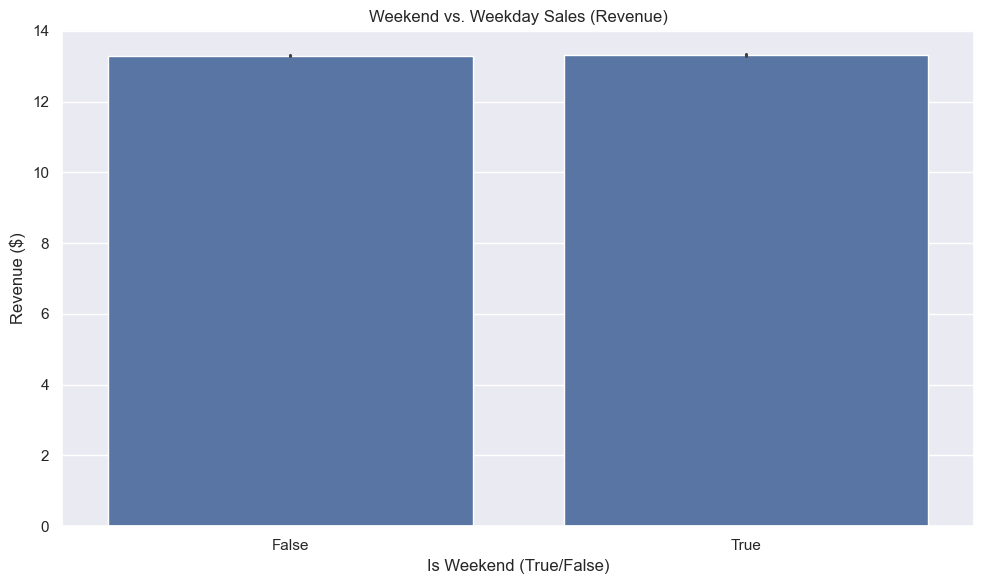

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sale_Is_Weekend', y='Revenue', data=df)
plt.xlabel('Is Weekend (True/False)')
plt.ylabel('Revenue ($)')
plt.title('Weekend vs. Weekday Sales (Revenue)')
plt.tight_layout()
plt.show()

Similar Distribution: The distribution of revenue is quite similar for both weekends and weekdays. Both show a concentration of sales around \$10, with some outliers reaching as high as \$40 or more.

Slightly Higher Median Revenue on Weekends: There is a slight difference in the median revenue, with weekends showing a marginally higher median than weekdays, but the variation is minimal.

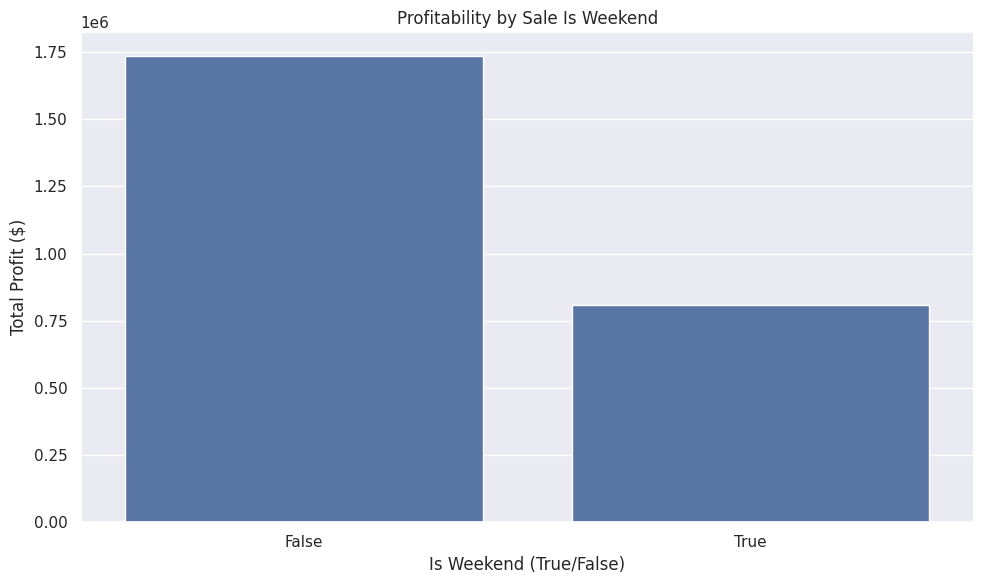

In [367]:
profit_by_weekend = df.groupby('Sale_Is_Weekend')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sale_Is_Weekend', y='Profit', data=profit_by_weekend)
plt.xlabel('Is Weekend (True/False)')
plt.ylabel('Total Profit ($)')
plt.title('Profitability by Sale Is Weekend')
plt.tight_layout()
plt.show()

Higher Profit on Weekdays: The total profit is significantly higher on weekdays (False) compared to weekends (True). Weekday profits are almost double the amount generated on weekends.

Weekend Profits: While weekends contribute to profits, the difference in total profitability suggests that more sales or higher-margin sales occur on weekdays.

Hypotheses:  
Sales Volume or Product Pricing: The significant difference in profitability could be due to either a higher volume of sales during weekdays or higher-priced products being sold. Analyzing sales volume and average product price by day type (weekend vs. weekday) could help clarify this.

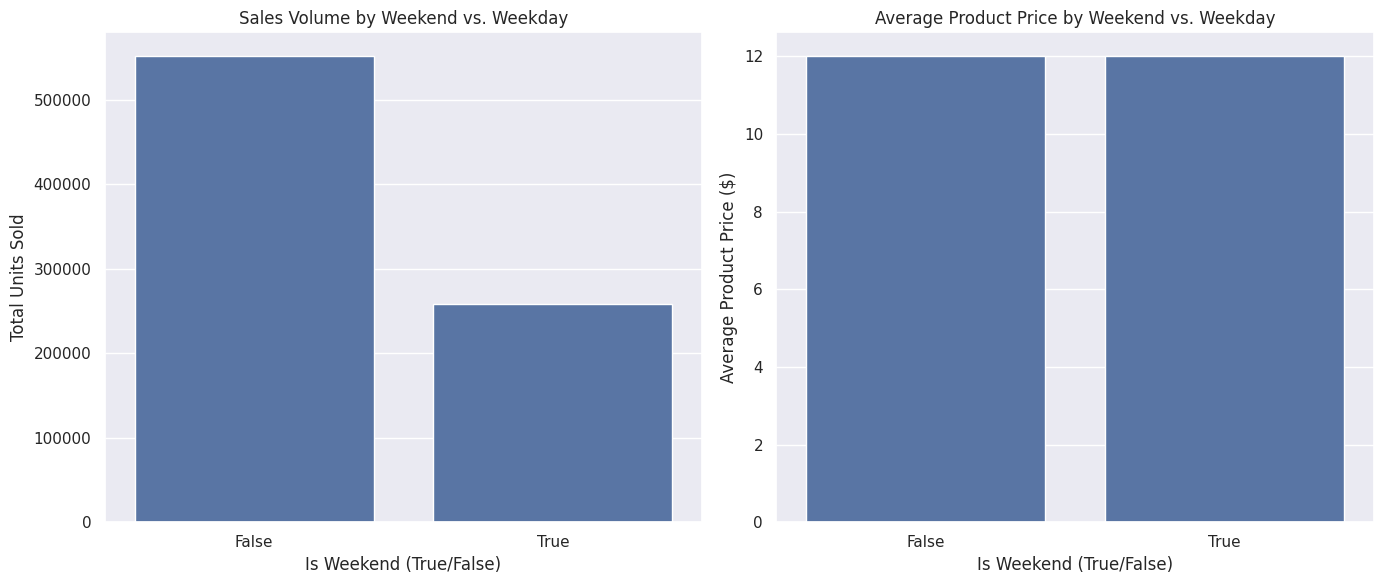

In [368]:
sales_data = df.groupby('Sale_Is_Weekend').agg(
    Total_Units_Sold=('Units', 'sum'),
    Avg_Product_Price=('Product_Price', 'mean')
).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Sale_Is_Weekend', y='Total_Units_Sold', data=sales_data, ax=ax[0])
ax[0].set_title('Sales Volume by Weekend vs. Weekday')
ax[0].set_xlabel('Is Weekend (True/False)')
ax[0].set_ylabel('Total Units Sold')

sns.barplot(x='Sale_Is_Weekend', y='Avg_Product_Price', data=sales_data, ax=ax[1])
ax[1].set_title('Average Product Price by Weekend vs. Weekday')
ax[1].set_xlabel('Is Weekend (True/False)')
ax[1].set_ylabel('Average Product Price ($)')

plt.tight_layout()
plt.show()


Sales Volume as the Key Driver of Profitability:

From the Sales Volume plot, we see that weekdays (False) have much higher total units sold compared to weekends.
This higher sales volume during weekdays likely contributes significantly to the higher overall profitability observed on weekdays in the Profitability by Sale Is Weekend plot.
Despite similar product prices, the sheer volume of sales on weekdays leads to more profit being generated.

Average Product Price Consistency:

The Average Product Price plot shows no significant difference between the prices of products sold on weekends and weekdays. This suggests that the difference in profitability is not driven by selling more expensive products on weekdays.
The similarity in product prices means that the higher weekday profitability is more closely linked to the greater sales volume rather than product pricing differences.

Conclusion:

Higher Weekday Sales Volume: The large sales volume during weekdays drives up profitability, even though the product prices remain relatively constant across both weekdays and weekends.
Stable Pricing: Since product pricing is consistent, the increased number of transactions on weekdays is the primary factor leading to higher profits.


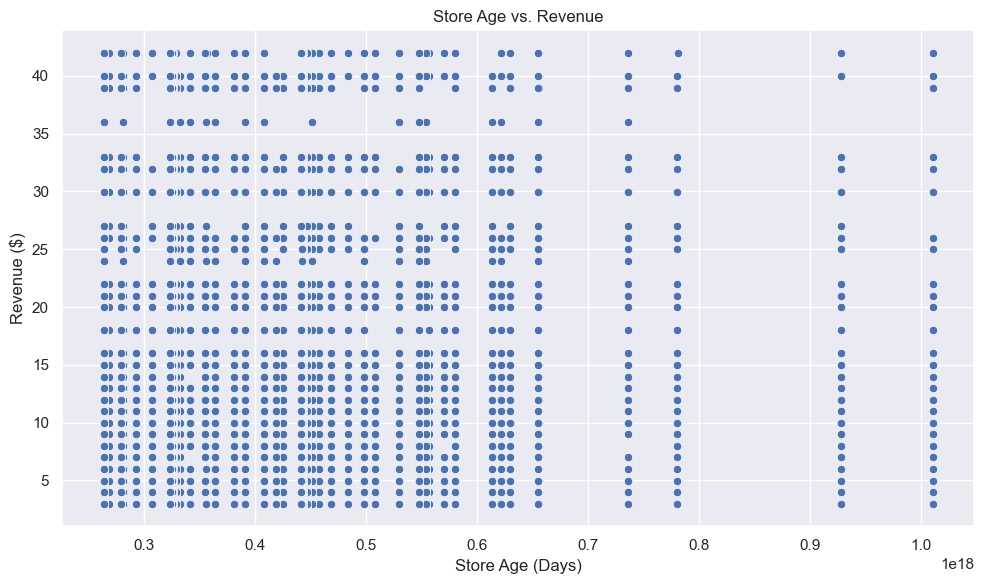

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Age', y='Revenue', data=df)
plt.xlabel('Store Age (Days)')
plt.ylabel('Revenue ($)')
plt.title('Store Age vs. Revenue')
plt.tight_layout()
plt.show()

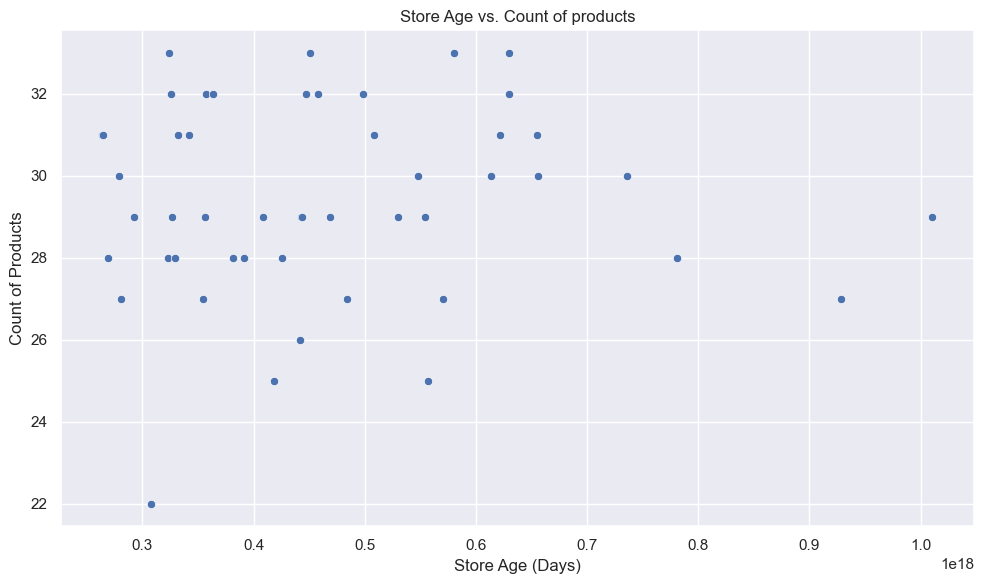

In [171]:
plt.figure(figsize=(10, 6))

products_per_store = df.groupby('Store_Age')['Product_Name'].nunique().reset_index()

sns.scatterplot(x='Store_Age', y='Product_Name', data=products_per_store)
plt.xlabel('Store Age (Days)')
plt.ylabel('Count of Products')
plt.title('Store Age vs. Count of products')
plt.tight_layout()
plt.show()

<ipython-input-371-82c1b10c7aa4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue_category = df.groupby(['Sale_Month', 'Product_Category'])['Revenue'].sum().reset_index()


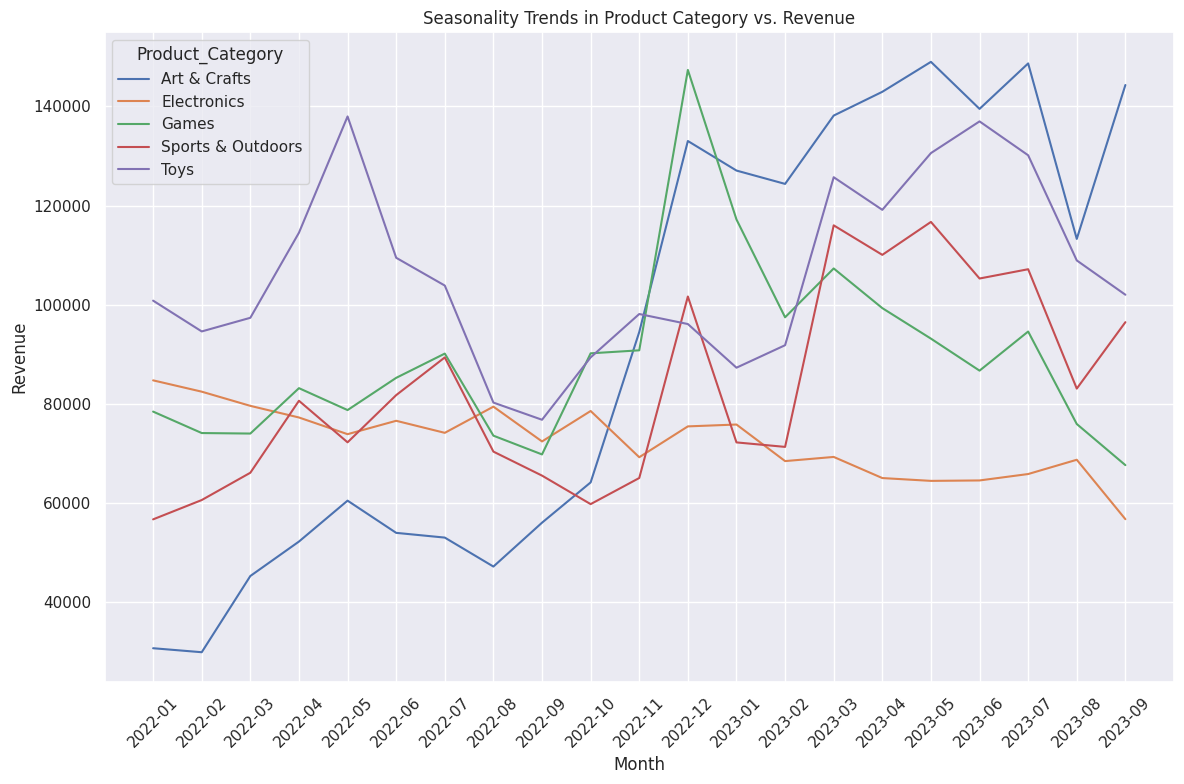

In [371]:
df['Sale_Month'] = df['Date'].dt.to_period('M')
monthly_revenue_category = df.groupby(['Sale_Month', 'Product_Category'])['Revenue'].sum().reset_index()
monthly_revenue_category['Sale_Month'] = monthly_revenue_category['Sale_Month'].astype(str)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Sale_Month', y='Revenue', hue='Product_Category', data=monthly_revenue_category)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Seasonality Trends in Product Category vs. Revenue')
plt.tight_layout()
plt.show()

Toys Category:

The Toys category shows a significant peak in revenue around November-December, suggesting a strong holiday season effect. This is likely due to the increased demand for toys during the holiday shopping season.
After the holiday period, revenue for this category drops sharply.

Games and Art & Crafts:

Both the Games and Art & Crafts categories also show a noticeable spike around the holiday season (November-December), though less pronounced compared to the Toys category.

Electronics and Sports & Outdoors:

These categories exhibit more stable revenue trends throughout the year, with no significant seasonal spikes.
The revenue for Electronics declines slightly toward the end of the period, while Sports & Outdoors shows a slight increase in revenue during the summer months (June-August), possibly due to outdoor activities being more popular during this time.

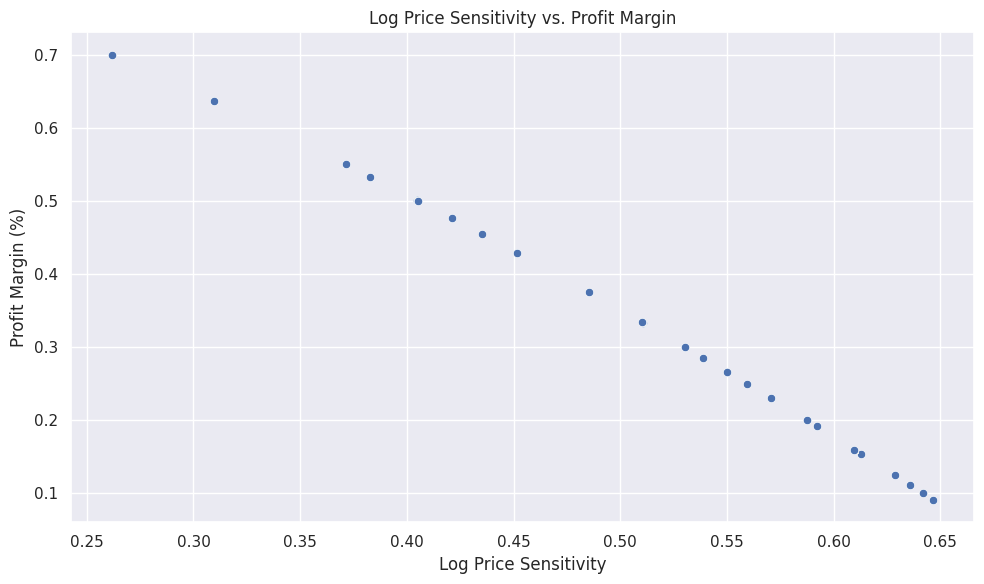

In [372]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Price_Sensitivity', y='Profit_Margin', data=df)
plt.xlabel('Log Price Sensitivity')
plt.ylabel('Profit Margin (%)')
plt.title('Log Price Sensitivity vs. Profit Margin')
plt.tight_layout()
plt.show()

Strong Negative Correlation: There is a clear inverse relationship between Log Price Sensitivity and Profit Margin. As price sensitivity increases (higher values on the x-axis), the profit margin decreases consistently. This suggests that as customers become more sensitive to price, the profit margin for products drops.

Impact on Revenue: While price sensitivity negatively impacts profit margin, it would be worth examining if this also leads to higher sales volumes (i.e., higher revenue compensating for lower margins).

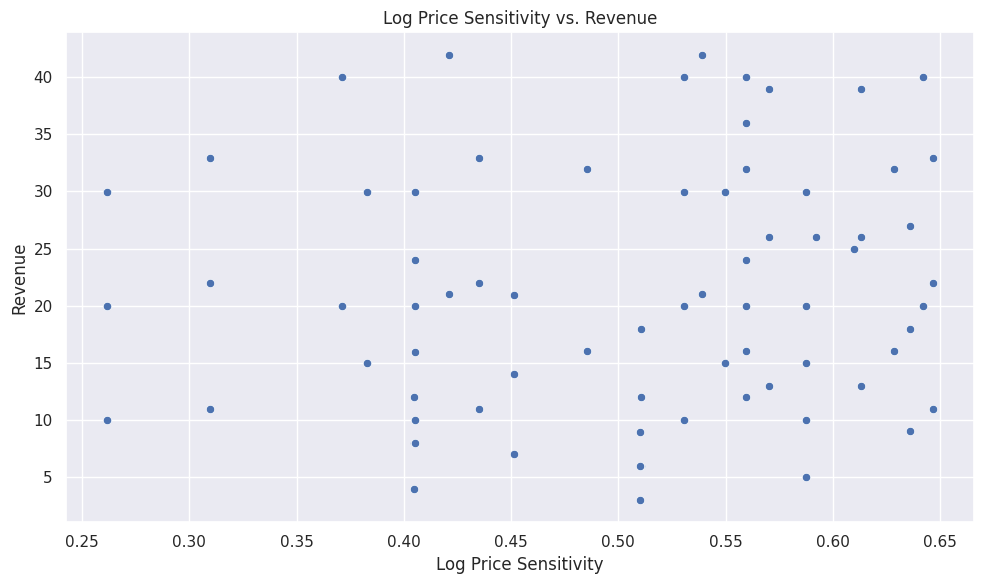

In [373]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Price_Sensitivity', y='Revenue', data=df)
plt.xlabel('Log Price Sensitivity')
plt.ylabel('Revenue')
plt.title('Log Price Sensitivity vs. Revenue')
plt.tight_layout()
plt.show()

No Strong Correlation: There does not appear to be a strong or clear relationship between Log Price Sensitivity and Revenue. The data points are widely scattered across the range of price sensitivity, indicating that higher price sensitivity does not consistently lead to higher or lower revenue.

Broad Distribution: Revenue seems to fluctuate across all levels of price sensitivity, which suggests that other factors beyond price sensitivity may be influencing revenue.

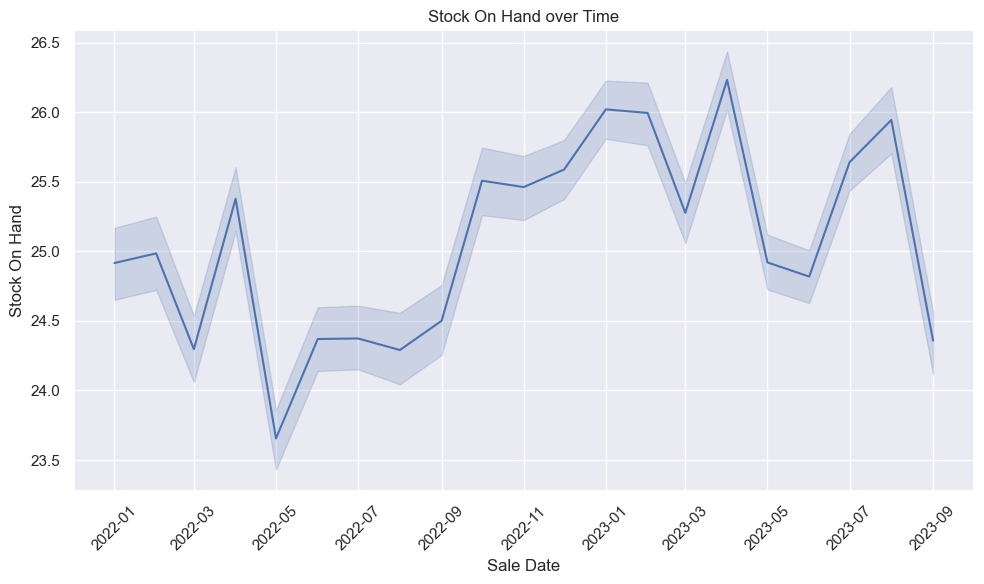

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sale_Date', y='Stock_On_Hand', data=df)
plt.xlabel('Sale Date')
plt.ylabel('Stock On Hand')
plt.title('Stock On Hand over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seasonal Fluctuations: There are clear periodic fluctuations in stock levels, with noticeable peaks around March, May, and July of both 2022 and 2023. This could indicate restocking patterns or increased demand during specific periods, causing stock levels to increase and decrease cyclically.

Stable Average Stock Levels: Despite the fluctuations, the overall average stock level stays relatively consistent over time, hovering around 25 units.

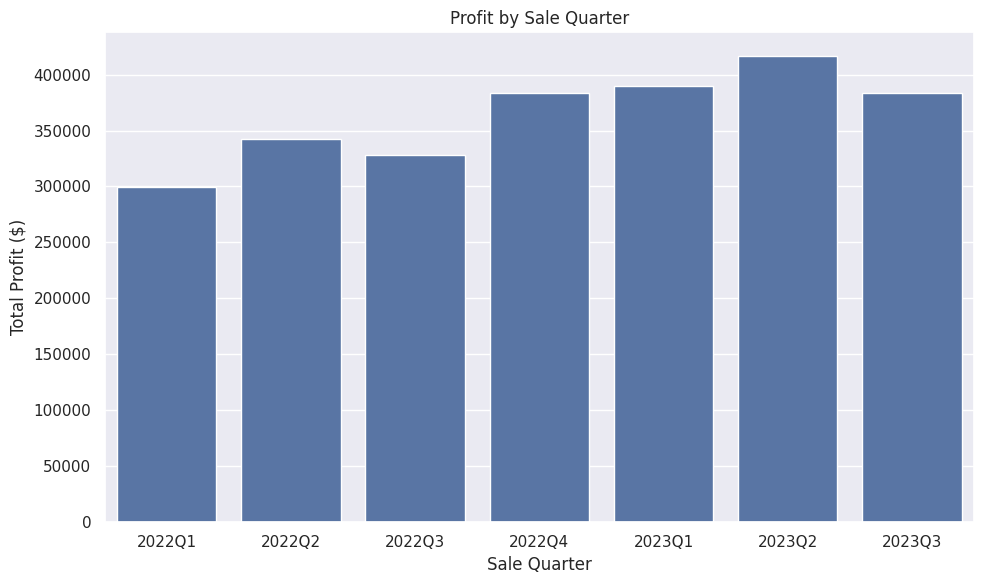

In [376]:
profit_by_quarter = df.groupby('Sale_Quarter')['Profit'].sum().reset_index()
profit_by_quarter = profit_by_quarter.sort_values(by='Sale_Quarter')

plt.figure(figsize=(10, 6))
sns.barplot(x='Sale_Quarter', y='Profit', data=profit_by_quarter)
plt.xlabel('Sale Quarter')
plt.ylabel('Total Profit ($)')
plt.title('Profit by Sale Quarter')
plt.tight_layout()
plt.show()

Quarterly Growth in Profit: There is a noticeable increase in profit from 2022Q1 to 2023Q2, with 2023Q2 showing the highest profit across all quarters. This suggests a steady growth in profitability over time, possibly due to improved sales performance or better cost management.

Drop in 2023Q3: There is a decline in profit in 2023Q3, although it is still higher than the profits observed in 2022Q1 and 2022Q3. This drop could be a temporary fluctuation or indicate a seasonal effect that reduced profitability in that quarter.

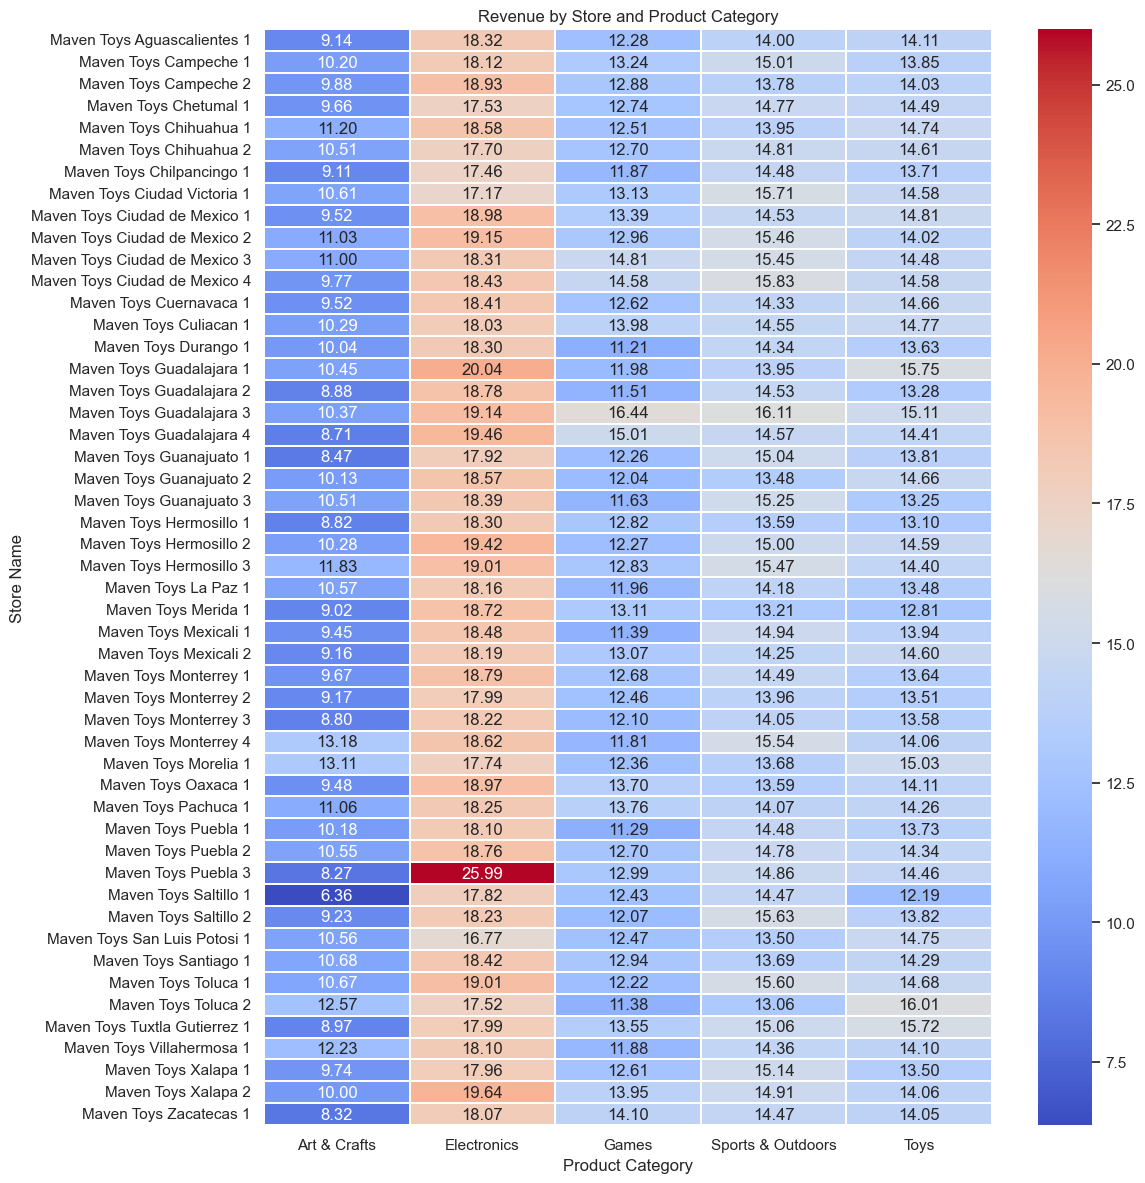

In [101]:
profit_margin_pivot = df.pivot_table(values='Revenue', index='Store_Name', columns='Product_Category', aggfunc='mean')

plt.figure(figsize=(12, 12))
sns.heatmap(profit_margin_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.xlabel('Product Category')
plt.ylabel('Store Name')
plt.title('Revenue by Store and Product Category')
plt.tight_layout()
plt.show()

High Revenue in Electronics:

Across many stores, the Electronics category consistently generates high revenue. For example, stores like Maven Toys Puebla 3 and Maven Toys Oaxaca 1 report values nearing or exceeding $25, with Puebla 3 being the highest. Electronics seem to be a key driver of revenue, and strategies could be designed around this category to further increase profitability.
Art & Crafts Lower Revenue:

In contrast, the Art & Crafts category shows significantly lower revenue across most stores, particularly at Maven Toys Saltillo 2 and Maven Toys Guadalajara 4, which report revenues below $7. This may suggest a lower demand or lesser focus on this product category in these locations.
Variability in Sports & Outdoors:

The Sports & Outdoors category shows significant variability across stores. Some stores like Maven Toys Oaxaca 1 and Maven Toys Puebla 1 report relatively higher revenues in this category, while other stores such as Maven Toys Zacatecas 1 report lower figures.
Games and Toys Steady Revenue:

Games and Toys have consistent, moderate revenue levels across most stores. Although they don't achieve the same high levels as Electronics, they maintain steady performance, which suggests that these categories form a stable revenue source across the board.

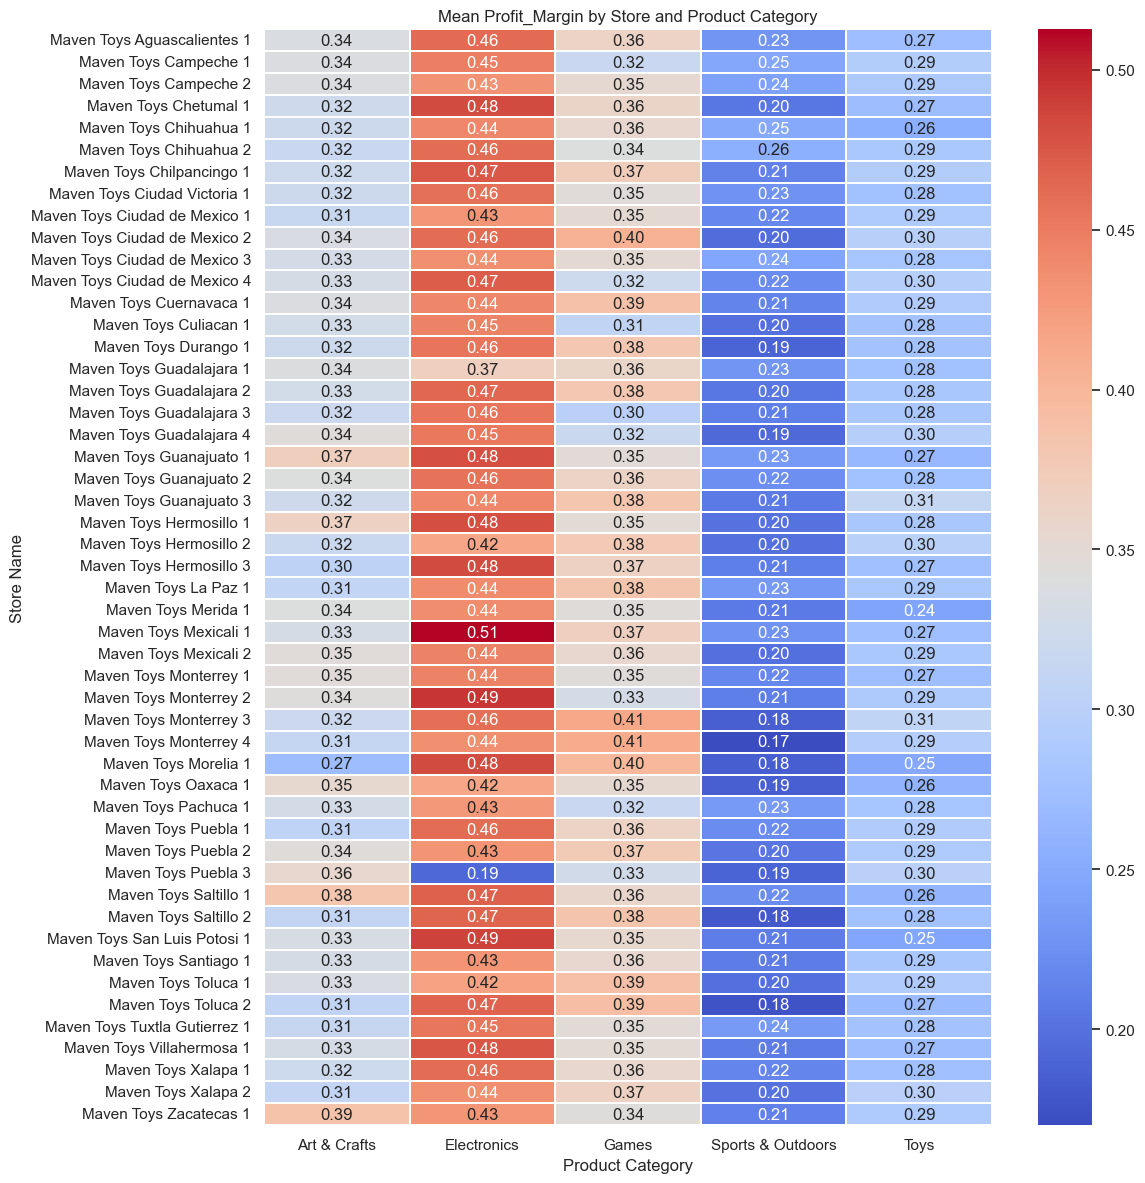

In [113]:
profit_margin_pivot = df.pivot_table(values='Profit_Margin', index='Store_Name', columns='Product_Category', aggfunc='mean')

plt.figure(figsize=(12, 12))
sns.heatmap(profit_margin_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.xlabel('Product Category')
plt.ylabel('Store Name')
plt.title('Mean Profit_Margin by Store and Product Category')
plt.tight_layout()
plt.show()

Electronics Have the Highest Profit Margins: Across nearly all stores, the Electronics category shows the highest profit margins, with values typically ranging from 0.43 to 0.51. This suggests that electronics generate a higher return compared to other product categories.

Toys Have the Lowest Margins: The Toys category tends to have the lowest profit margins across most stores, often ranging between 0.18 and 0.31. This indicates that, while toys may generate high revenue, their profit margins are comparatively lower than other categories.

Consistent Margins Across Stores: While there are some variations, the profit margins within each product category tend to be relatively consistent across different stores. This suggests that the profit margin strategy might be standardized across locations for each product category.

Store Variations in Certain Categories: Some stores have higher or lower profit margins in specific categories. For example, Maven Toys Merida 1 has a particularly high margin in Electronics (0.51), while Maven Toys Puebla 3 has an unusually low margin in Electronics (0.19). This variation might be influenced by local demand, pricing strategies, or competition in these regions.

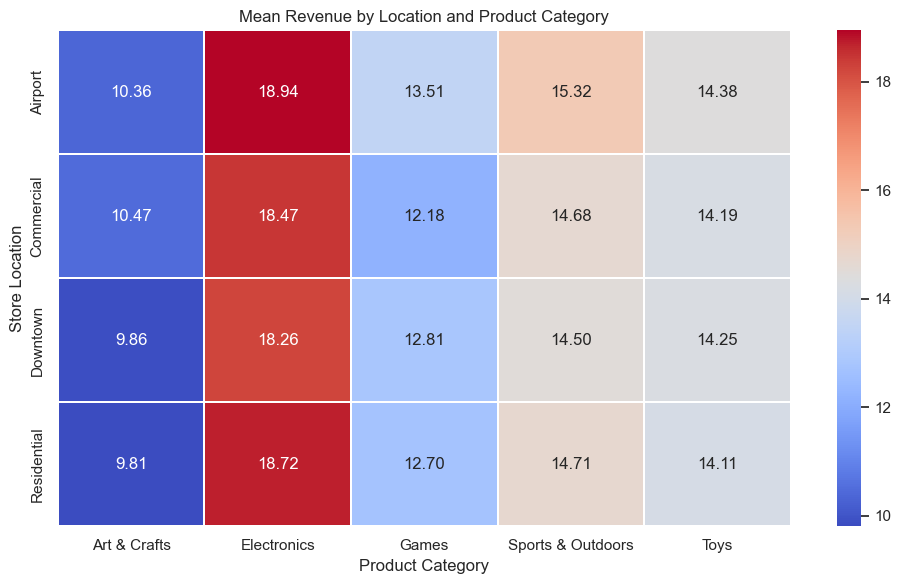

In [125]:
profit_margin_pivot = df.pivot_table(values='Revenue', index='Store_Location', columns='Product_Category', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(profit_margin_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.xlabel('Product Category')
plt.ylabel('Store Location')
plt.title('Mean Revenue by Location and Product Category')
plt.tight_layout()
plt.show()

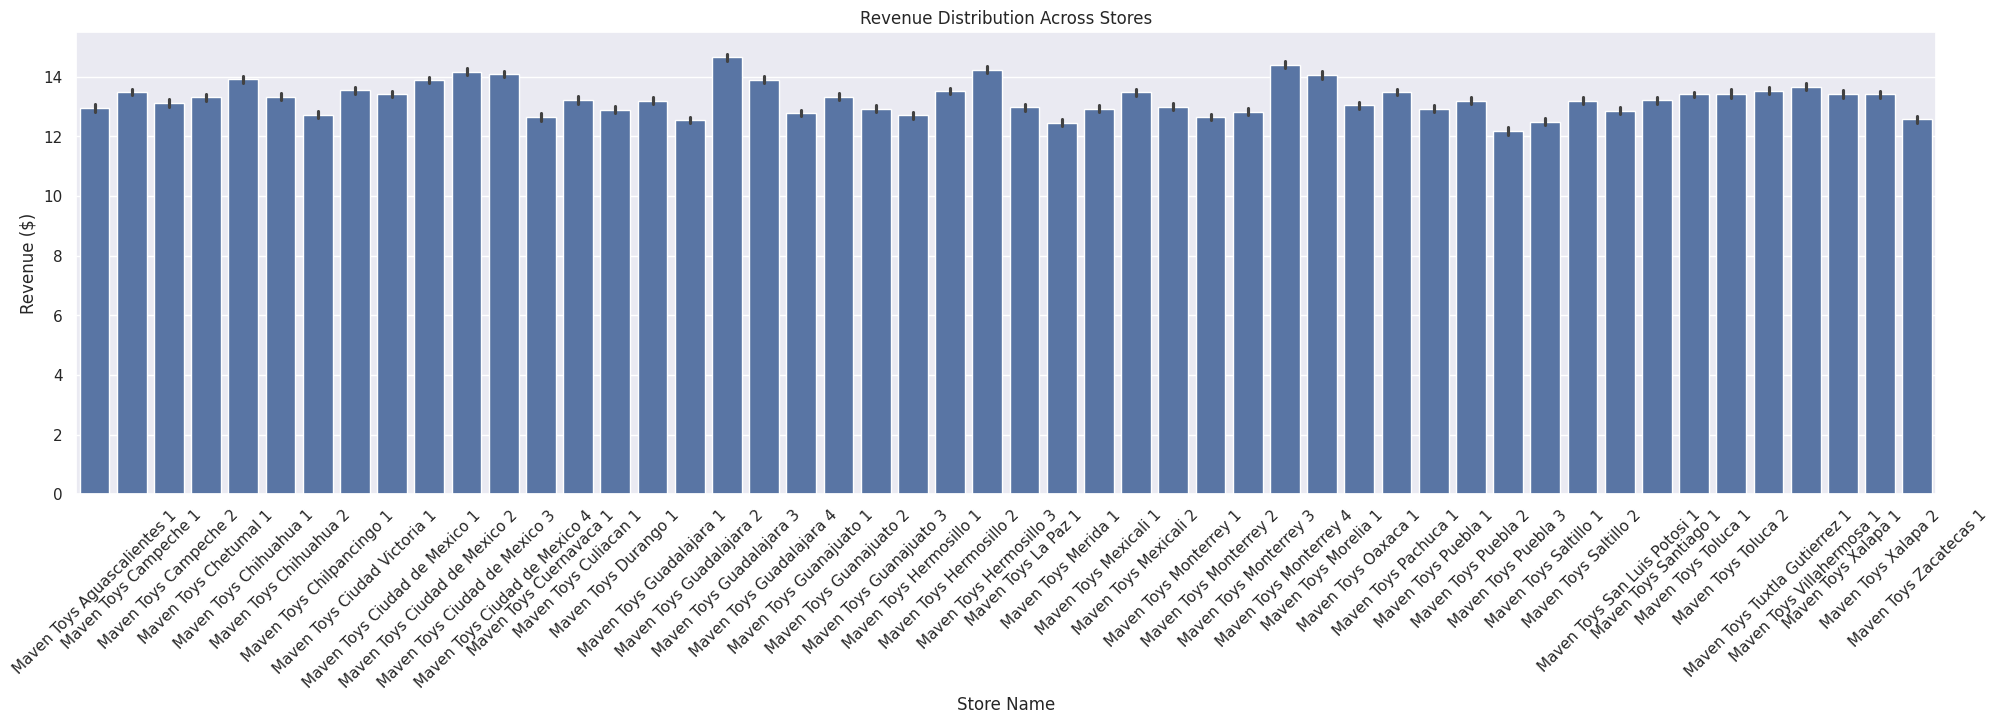

In [ ]:
plt.figure(figsize=(24, 6))
sns.barplot(x='Store_Name', y='Revenue', data=df)
plt.xlabel('Store Name')
plt.ylabel('Revenue ($)')
plt.title('Revenue Distribution Across Stores')
plt.xticks(rotation=45)
plt.show()

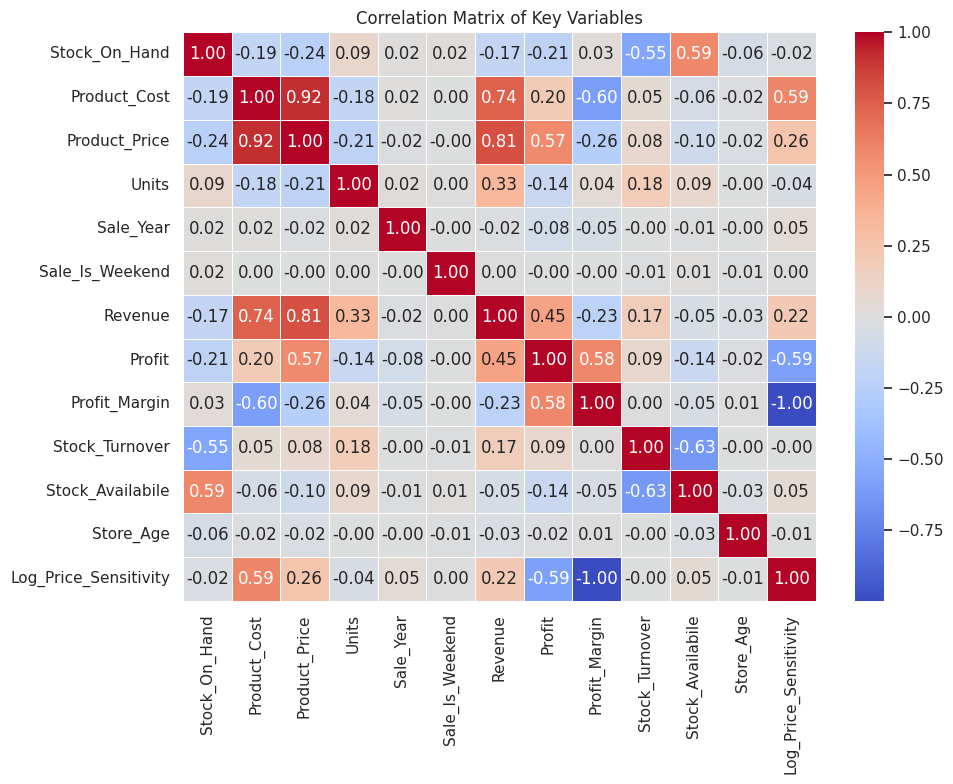

In [378]:
correlation_matrix = df[['Stock_On_Hand', 'Product_Cost', 'Product_Price', 'Units',
                         'Sale_Year', 'Sale_Is_Weekend', 'Revenue', 'Profit', 'Profit_Margin',
                         'Stock_Turnover', 'Stock_Availabile', 'Store_Age', 'Log_Price_Sensitivity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

Revenue shows a strong positive correlation with both Product Cost (0.74) and Product Price (0.81). This indicates that higher-priced products tend to generate more revenue.

Stock Turnover has a significant negative correlation with Stock On Hand (-0.55). This suggests that products with lower stock tend to have a higher turnover, indicating strong demand.

Profit Margin has a negative correlation with Product Cost (-0.60), indicating that products with lower costs tend to have higher profit margins.

There is a negative correlation between Profit Margin and Stock Turnover (-0.23). This suggests that products with high turnover (likely lower-priced, high-demand items) tend to have lower profit margins.

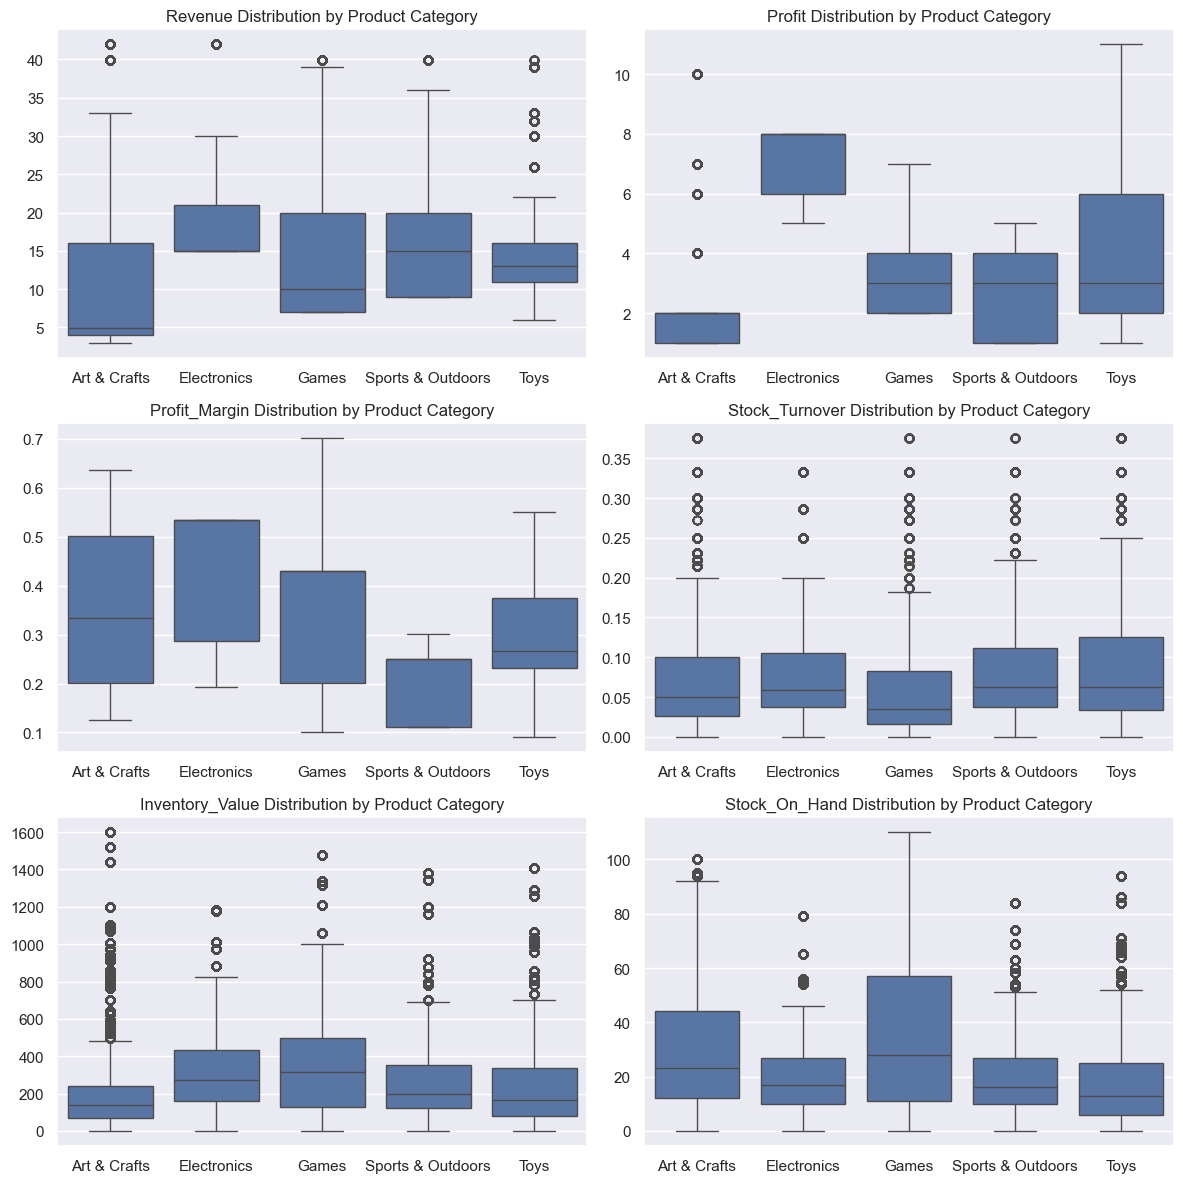

In [134]:
columns_to_plot = ['Revenue', 'Profit', 'Profit_Margin', 'Stock_Turnover', 'Inventory_Value', 'Stock_On_Hand']

plt.figure(figsize=(12, 12))

for i, column in enumerate(columns_to_plot, start=1): 
    plt.subplot(3, 2, i)

    sns.boxplot(x='Product_Category', y=column, data=df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'{column} Distribution by Product Category')

    
plt.tight_layout()
plt.show()

Lower Median for Games:

The Games category has a noticeably lower median stock turnover compared to other categories. This suggests that products in the Games category generally have slower stock movement compared to categories like Art & Crafts or Toys.
Consistent Medians in Other Categories:

The remaining categories, including Electronics, Sports & Outdoors, and Toys, show similar median values, indicating comparable stock turnover rates for these products.
Outliers:

All categories exhibit outliers, with some products turning over at much higher rates than the rest, particularly in Electronics, Toys, and Sports & Outdoors. This suggests that certain high-demand items drive up the turnover in these categories.
Variation in Stock Turnover:

The Art & Crafts and Toys categories have a larger interquartile range (IQR), showing greater variability in stock turnover rates compared to the Games category, which has a tighter spread.


C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\1961265486.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_location = df.groupby('Store_Location')['Revenue'].sum()
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\1961265486.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_category = df.groupby('Product_Category')['Revenue'].sum()


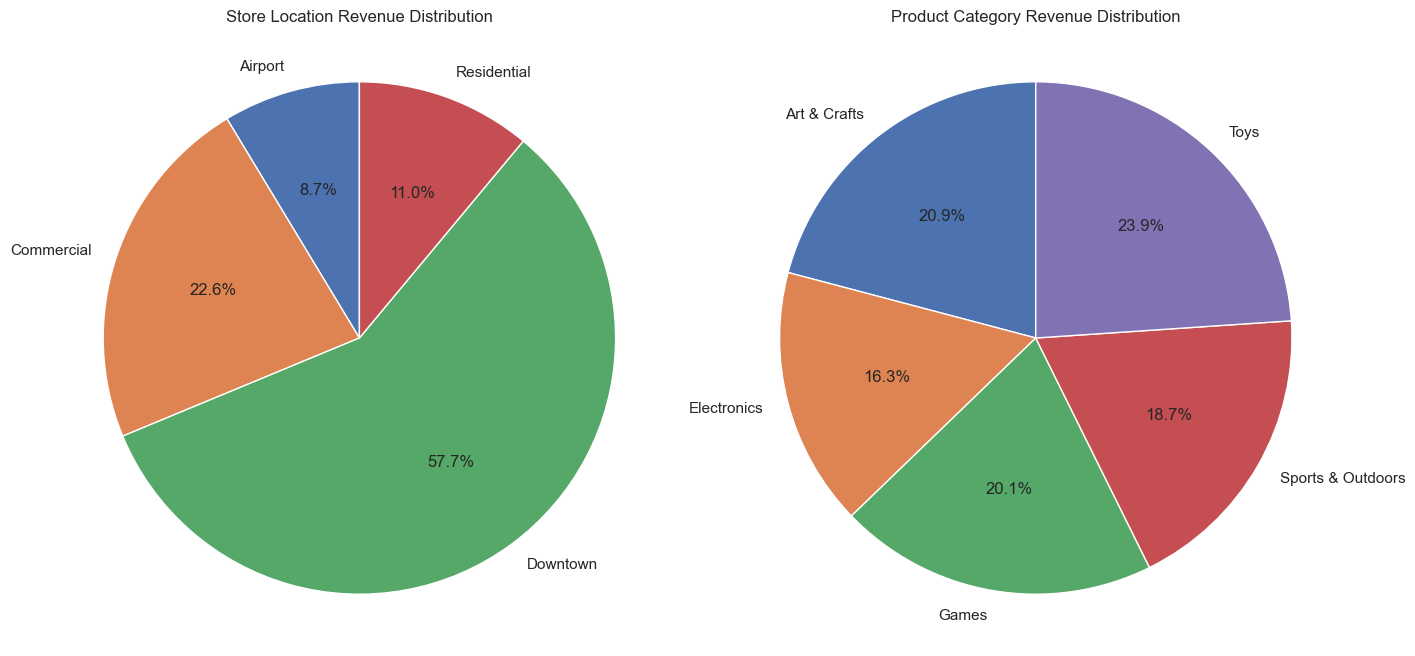

In [144]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sales_by_location = df.groupby('Store_Location')['Revenue'].sum()
plt.pie(sales_by_location, labels=sales_by_location.index, autopct='%1.1f%%', startangle=90)
plt.title('Store Location Revenue Distribution')
plt.axis('equal')

plt.subplot(1, 2, 2)
revenue_by_category = df.groupby('Product_Category')['Revenue'].sum()
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Revenue Distribution')
plt.axis('equal')
plt.show()

Downtown stores dominate sales, contributing 57.6% of the total.
Commercial locations are the second-largest contributor, accounting for 23.0%.
Residential areas contribute 11.3%, while Airport locations make up only 8.1%.
The dominance of Downtown locations suggests they are likely high-traffic areas contributing significantly to overall sales.

Toys account for the largest share of revenue, contributing to 28.7% of the total.
Electronics and Games follow closely, contributing 20.7% and 19.8% of the revenue, respectively.
Sports & Outdoors also holds a significant portion at 19.1%.
Art & Crafts has the smallest share at 11.7%.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\2736265118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_category_location = df.groupby(['Store_Location', 'Product_Category'])['Revenue'].mean().reset_index()


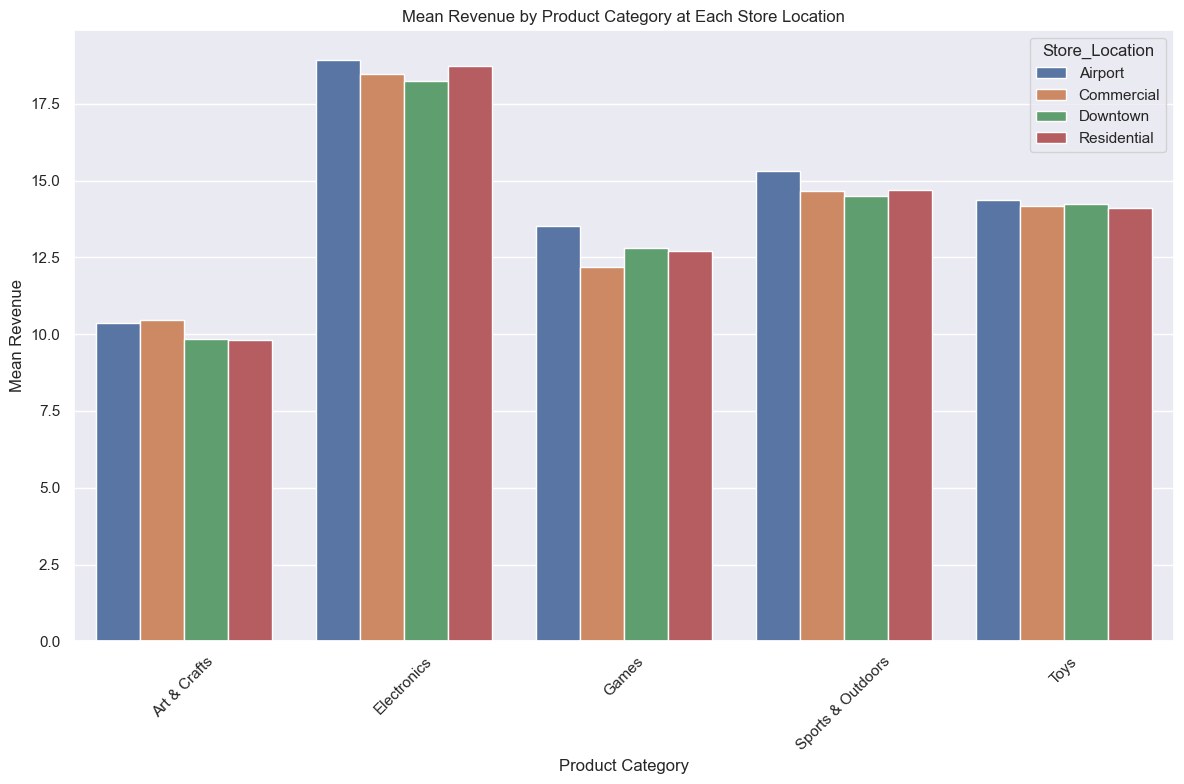

In [145]:
avg_sales_by_category_location = df.groupby(['Store_Location', 'Product_Category'])['Revenue'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Category', y='Revenue', hue='Store_Location', data=avg_sales_by_category_location)
plt.xlabel('Product Category')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue by Product Category at Each Store Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Electronics generate the highest average revenue across all store locations, with Residential stores performing slightly better in this category.  
Art & Crafts products have the lowest average revenue, particularly in Airport stores.  
Toys, Sports & Outdoors, and Games categories have relatively consistent revenue across store locations, with minor variations.  
Airport locations generally exhibit lower revenue across all categories compared to other store types, indicating that these stores may not perform as well in terms of sales volume or product variety.  

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\3447099081.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_revenue_by_location = df.groupby(['Store_Location', 'Sale_Month'])['Revenue'].mean().reset_index()


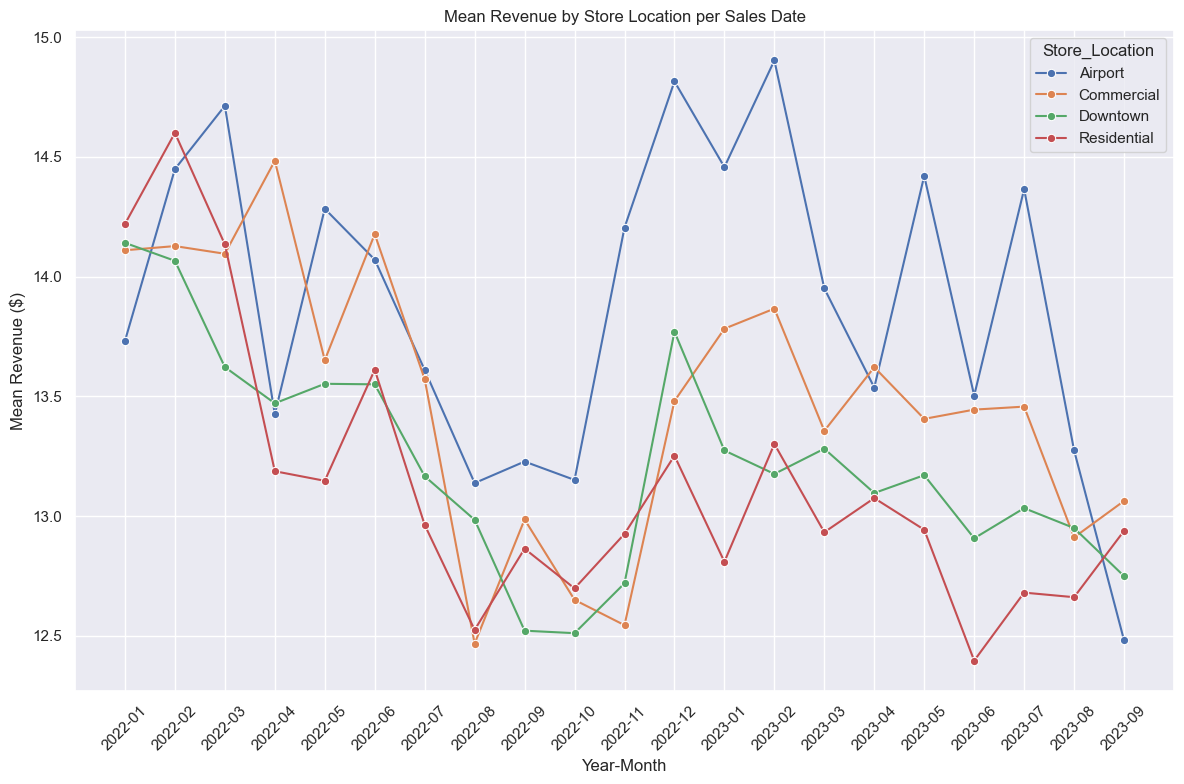

In [183]:
df['Sale_Month'] = df['Date'].dt.to_period('M')
mean_revenue_by_location = df.groupby(['Store_Location', 'Sale_Month'])['Revenue'].mean().reset_index()
mean_revenue_by_location['Sale_Month'] = mean_revenue_by_location['Sale_Month'].astype(str)

plt.figure(figsize=(12, 8))
sns.lineplot(x='Sale_Month', y='Revenue', hue='Store_Location', data=mean_revenue_by_location, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Mean Revenue ($)')
plt.title('Mean Revenue by Store Location per Sales Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Airport and Residential locations show more significant fluctuations in revenue over time, with noticeable peaks and troughs.  
Commercial locations seem more stable with less variance in mean revenue month over month.
Downtown locations have a generally decreasing trend in the first few months but start recovering around May 2022.  
The significant dip around April 2022 for all locations could indicate a seasonal effect or an external factor affecting sales.  

# Forecasting

In [ ]:
!pip install pmdarima -q
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [ ]:
df['Sale_Week'] = df['Sale_Year'].astype(str) + '-' + df['Date'].dt.isocalendar().week.astype(str)

weekly_stock = df.groupby('Sale_Week')['Stock_On_Hand'].sum().reset_index()

In [ ]:
arima_model = auto_arima(
    weekly_stock['Stock_On_Hand'],
    seasonal=True,
    trace=True,
    stepwise=True,
    start_p=0,
    d=1,
    start_q=0,
    max_p=10,
    max_d=10,
    max_q=10,
    start_P=0,
    D=1,
    start_Q=0,
    max_P=10,
    max_D=10,
    max_Q=10,
    m=48
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[48]             : AIC=1046.011, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[48]             : AIC=1042.956, Time=1.58 sec
 ARIMA(0,1,1)(0,1,1)[48]             : AIC=inf, Time=4.85 sec
 ARIMA(1,1,0)(0,1,0)[48]             : AIC=1041.027, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[48]             : AIC=1042.956, Time=1.35 sec
 ARIMA(1,1,0)(1,1,1)[48]             : AIC=1044.956, Time=1.45 sec
 ARIMA(2,1,0)(0,1,0)[48]             : AIC=1040.748, Time=0.33 sec
 ARIMA(2,1,0)(1,1,0)[48]             : AIC=1042.326, Time=2.13 sec
 ARIMA(2,1,0)(0,1,1)[48]             : AIC=inf, Time=3.48 sec
 ARIMA(2,1,0)(1,1,1)[48]             : AIC=inf, Time=17.26 sec
 ARIMA(3,1,0)(0,1,0)[48]             : AIC=1042.777, Time=1.70 sec
 ARIMA(2,1,1)(0,1,0)[48]             : AIC=1042.147, Time=0.94 sec
 ARIMA(1,1,1)(0,1,0)[48]             : AIC=1039.420, Time=0.47 sec
 ARIMA(1,1,1)(1,1,0)[48]             : AIC=1040.828, Time=2.20 sec
 ARIMA(1,1,1)(0,1,1)[48]         

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   92
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 48)   Log Likelihood                -516.710
Date:                             Thu, 26 Sep 2024   AIC                           1039.420
Time:                                     18:35:16   BIC                           1044.704
Sample:                                          0   HQIC                          1041.369
                                              - 92                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4385      0.195      2.246      0.025       0.056       0.821
ma.L1         -0.7455      0.174     -4.273      0.000      -1.087      -0.404
sigma2      1.426e+09   2.46e-10    5.8e+18      0.000    1.43e+09    1.43e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.44   Jarque-Bera (JB):               107.74
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               3.64   Skew:                            -1.50
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+34. Standard errors may be unstable.
"""

In [ ]:
train_size = int(len(weekly_stock) * 0.7)
train_data, test_data = weekly_stock[0:train_size], weekly_stock[train_size:len(weekly_stock)]

In [ ]:
sarimax_model = SARIMAX(
    train_data['Stock_On_Hand'],
    order=(1, 1, 1),
    seasonal_order=(0, 1, 0, 48)
)
sarimax_result = sarimax_model.fit()

In [ ]:
sarimax_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Stock_On_Hand   No. Observations:                   64
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 48)   Log Likelihood                -172.727
Date:                             Thu, 26 Sep 2024   AIC                            351.454
Time:                                     18:46:17   BIC                            353.578
Sample:                                          0   HQIC                           351.432
                                              - 64                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7659      0.272      2.814      0.005       0.233       1.299
ma.L1         -0.8765      0.205     -4.268      0.000      -1.279      -0.474
sigma2      5.503e+08   1.15e-10   4.78e+18      0.000     5.5e+08     5.5e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.33   Prob(JB):                         0.80
Heteroskedasticity (H):               0.28   Skew:                             0.35
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.7e+35. Standard errors may be unstable.
"""

In [ ]:
train_start_index = 0
train_end_index = len(train_data) - 1
train_predictions = sarimax_result.predict(train_start_index, train_end_index)

test_start_index = len(train_data)
test_end_index = len(weekly_stock) - 1
test_predictions = sarimax_result.predict(test_start_index, test_end_index)

forecasted_values = sarimax_result.predict(len(weekly_stock), (len(weekly_stock) - 1) + 12).rename('Forecast')

In [ ]:
print('Absolute Error:', metrics.mean_absolute_error(test_data['Stock_On_Hand'], test_predictions))
print('MSE:', metrics.mean_squared_error(test_data['Stock_On_Hand'], test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_data['Stock_On_Hand'], test_predictions)))

Absolute Error: 36417.108476791196
MSE: 3045938319.838544
RMSE: 55190.0201108728


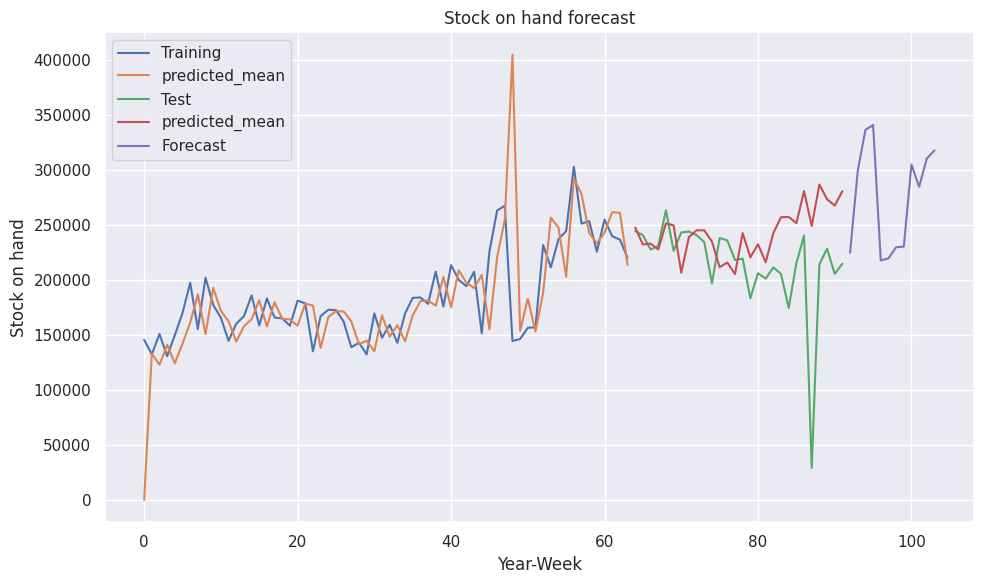

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))

train_data['Stock_On_Hand'].plot(label="Training")
train_predictions.plot(legend=True)
test_data['Stock_On_Hand'].plot(label="Test")
test_predictions.plot(legend=True)
forecasted_values.plot(label="Forecast")
plt.legend()
plt.xlabel('Year-Week')
plt.ylabel('Stock on hand')
plt.title('Stock on hand forecast')
plt.tight_layout()
plt.show()

Since the forecast shows a gradual increase in stock, plan for inventory replenishment accordingly. Ensure that future stock levels do not exceed storage capacities.

The spikes around weeks 50 and 85 might indicate an unexpected event. Monitor for similar anomalies in the future and adjust the forecasting model to handle such deviations better.

In [ ]:
weekly_revenue = df.groupby('Sale_Week')['Revenue'].sum().reset_index()

In [ ]:
arima_model = auto_arima(
    weekly_revenue['Revenue'],
    seasonal=True,
    trace=True,
    stepwise=True,
    start_p=0,
    d=1,
    start_q=0,
    max_p=10,
    max_d=10,
    max_q=10,
    start_P=0,
    D=1,
    start_Q=0,
    max_P=10,
    max_D=10,
    max_Q=10,
    m=48
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[48]             : AIC=985.058, Time=0.26 sec
 ARIMA(1,1,0)(1,1,0)[48]             : AIC=984.901, Time=2.68 sec
 ARIMA(0,1,1)(0,1,1)[48]             : AIC=985.688, Time=4.88 sec
 ARIMA(1,1,0)(0,1,0)[48]             : AIC=983.261, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[48]             : AIC=984.890, Time=1.62 sec
 ARIMA(1,1,0)(1,1,1)[48]             : AIC=inf, Time=3.87 sec
 ARIMA(2,1,0)(0,1,0)[48]             : AIC=984.542, Time=0.33 sec
 ARIMA(1,1,1)(0,1,0)[48]             : AIC=982.897, Time=0.60 sec
 ARIMA(1,1,1)(1,1,0)[48]             : AIC=984.776, Time=5.89 sec
 ARIMA(1,1,1)(0,1,1)[48]             : AIC=984.775, Time=2.70 sec
 ARIMA(1,1,1)(1,1,1)[48]             : AIC=inf, Time=14.66 sec
 ARIMA(0,1,1)(0,1,0)[48]             : AIC=983.706, Time=0.28 sec
 ARIMA(2,1,1)(0,1,0)[48]             : AIC=985.591, Time=0.83 sec
 ARIMA(1,1,2)(0,1,0)[48]             : AIC=985.587, Time=0.74 sec
 ARIMA(0,1,2)(0,1,0)[48]             : A

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   92
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 48)   Log Likelihood                -488.449
Date:                             Thu, 26 Sep 2024   AIC                            982.897
Time:                                     18:36:00   BIC                            988.181
Sample:                                          0   HQIC                           984.846
                                              - 92                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5110      0.161      3.183      0.001       0.196       0.826
ma.L1         -0.7806      0.156     -4.994      0.000      -1.087      -0.474
sigma2       3.31e+08    4.2e-10   7.88e+17      0.000    3.31e+08    3.31e+08
===================================================================================
Ljung-Box (L1) (Q):                   3.58   Jarque-Bera (JB):               142.81
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -2.02
Prob(H) (two-sided):                  0.06   Kurtosis:                        10.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.73e+32. Standard errors may be unstable.
"""

In [ ]:
train_size = int(len(weekly_revenue) * 0.7)
train_data, test_data = weekly_revenue[0:train_size], weekly_revenue[train_size:len(weekly_revenue)]

In [ ]:
sarimax_model = SARIMAX(
    train_data['Revenue'],
    order=(1, 1, 1),
    seasonal_order=(0, 1, 0, 48)
)
sarimax_result = sarimax_model.fit()

In [ ]:
sarimax_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Revenue   No. Observations:                   64
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 48)   Log Likelihood                -165.765
Date:                             Thu, 26 Sep 2024   AIC                            337.530
Time:                                     18:46:34   BIC                            339.654
Sample:                                          0   HQIC                           337.507
                                              - 64                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7836      0.331      2.365      0.018       0.134       1.433
ma.L1         -0.8694      0.287     -3.033      0.002      -1.431      -0.308
sigma2      2.323e+08   8.16e-10   2.85e+17      0.000    2.32e+08    2.32e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.13   Prob(JB):                         0.71
Heteroskedasticity (H):               0.64   Skew:                            -0.11
Prob(H) (two-sided):                  0.64   Kurtosis:                         1.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+33. Standard errors may be unstable.
"""

In [ ]:
train_start_index = 0
train_end_index = len(train_data) - 1
train_predictions = sarimax_result.predict(train_start_index, train_end_index)

test_start_index = len(train_data)
test_end_index = len(weekly_revenue) - 1
test_predictions = sarimax_result.predict(test_start_index, test_end_index)

forecasted_values = sarimax_result.predict(len(weekly_revenue), (len(weekly_revenue) - 1) + 12).rename('Forecast')

In [ ]:
print('Absolute Error:', metrics.mean_absolute_error(test_data['Revenue'], test_predictions))
print('MSE:', metrics.mean_squared_error(test_data['Revenue'], test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_data['Revenue'], test_predictions)))

Absolute Error: 14013.620564548733
MSE: 500846636.5881342
RMSE: 22379.603137413636


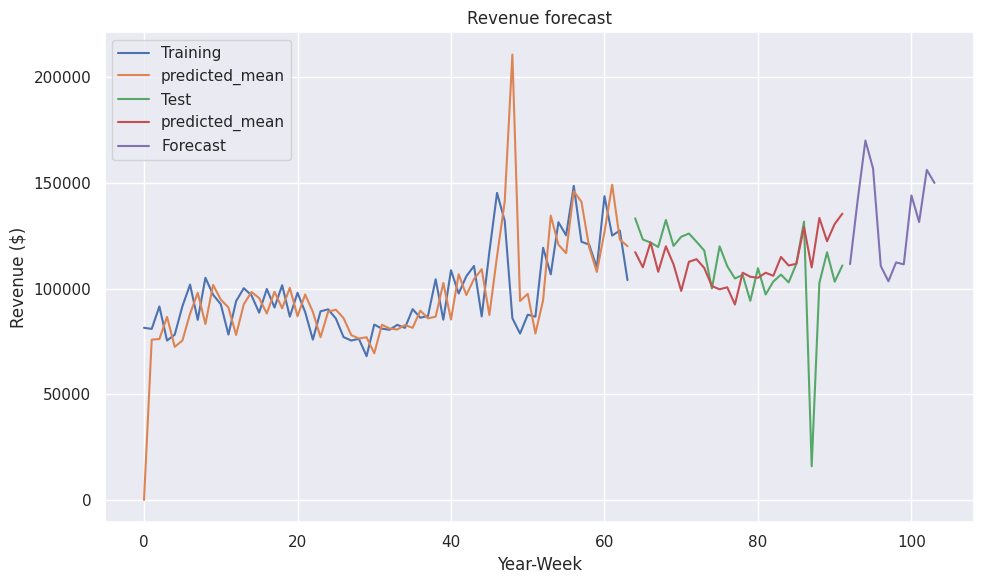

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))

train_data['Revenue'].plot(label="Training")
train_predictions.plot(legend=True)
test_data['Revenue'].plot(label="Test")
test_predictions.plot(legend=True)
forecasted_values.plot(label="Forecast")
plt.legend()
plt.xlabel('Year-Week')
plt.ylabel('Revenue ($)')
plt.title('Revenue forecast')
plt.tight_layout()
plt.show()

General Growth Trend: The overall revenue has been growing over time, as seen in the training data. However, the trend fluctuates, with several peaks and drops indicating variability in revenue week to week.

Spike in Revenue: A significant spike around week 50 is observed, which could suggest a promotional event, seasonal demand, or an anomaly.

Revenue smoothing: To manage cash flow effectively, consider strategies to smooth revenue during weeks where drops are expected. This could include adjusting payment terms, offering early payment discounts, or varying product pricing strategies.

Avoid overstocking: After the revenue spike, it is likely to stabilize, so avoid overstocking, which may lead to excess inventory and increased holding costs.
